# <center>**Distributed Optimization and Learning**</center>
### <center>Project 1: Decentralized Optimization</center>
---


# <font color='#89A6FB'> Setup


> ## <font color='#EE4266'>Upload source files</font>


In [1]:
#@title
from google.colab import files
files.upload()

> ## <font color='#EE4266'> Install and Import Libraries </font>


In [3]:
#@title
# !pip install -r requirements.txt

In [4]:
#@title
%load_ext autoreload
%autoreload 2

import copy
import torch
from utils import DotDict,servers_plot
from servers import FedAdmm_Server, FedAvg_Server,FedProx_Server
import pandas as pd
import matplotlib.pyplot as plt

# Initialization


In [5]:
def form_dict():
    # @markdown <font color="#EC994B">Number of users
    num_users = 100  # @param {type:"slider", min:100, max:500, step:100}
    # @markdown <font color="#EC994B">Number of local epochs for clients training
    local_ep = 10  # @param {type:"integer"}
    # @markdown <font color="#EC994B">Batch size of clients training
    local_bs = 50  # @param {type:"integer"}
    # @markdown <font color="#EC994B">Learning Rate
    lr = 0.1  # @param {type:"slider", min:0, max:1, step:0.1}
    # @markdown <font color="#EC994B">Arcitecure of Neural Network
    model = 'Model1'  # @param ["Model1", "Model3"] {type:"string"}
    # @markdown <font color="#EC994B">Dataset
    dataset = "mnist"  # @param ["mnist" ,"cifar10","fmnist"] {type:"string"}
    # @markdown <font color="#EC994B">Distribution of dataset
    iid = True  # @param ["True","False"] {type:"raw"}
    # @markdown <font color="#EC994B"> Rho policy
    rho = 0.1  # @param {type:"slider", min:0, max:1, step:0.01}
    # @markdown <font color="#EC994B">seed
    seed = 2022  # @param {type:"number"}
    # @markdown <font color="#EC994B">optimizer
    optimizer = 'sgd'  # @param ["sgd","adam"] {type:"string"}
    # @markdown <font color="#EC994B">momentum
    momentum = 0.5  # @param {type:"slider", min:0, max:1, step:0.1}
    # @markdown <font color="#EC994B">verbose
    verbose = True  # @param ["True","False"] {type:"raw"}
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    return locals()


    # @markdown ---
args = DotDict(form_dict())

# <font color='#89A6FB'> Training


In [7]:
frac , rounds = 0.1,20

### <font color='#EC994B'>FedAvg</font>

In [16]:
fed_avg = FedAvg_Server(args)


Experimental details:
    Model     : Model1
    Optimizer : sgd
    Global Rounds   : None

    Federated parameters:
    IID
    dataset            : mnist
    Num of users       : 100
    Fraction of users  : None
    Learning  Rate     : 0.1
    rho                : 0.1
    Local Epochs       : 10
    Local Batch size   : 50

random seed = 2022

Model1(
  (conv): Sequential(
    (0): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
    (2): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (3): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  )
  (linear): Sequential(
    (0): Linear(in_features=3136, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=10, bias=True)
    (3): Softmax(dim=None)
  )
)


In [17]:
fed_avg.run(frac,rounds)

  0%|          | 0/20 [00:00<?, ?it/s]


 | Global Training Round : 1 |

 | # 1: 28 |
| Local Epoch :  1 | Train Loss: 2.291 | Train Acc: 27.59% | Val Loss: 4.528 | Val Acc: 41.67% |
| Local Epoch : 10 | Train Loss: 1.606 | Train Acc: 86.48% | Val Loss: 3.126 | Val Acc: 85.00% |
 | # 2: 42 |
| Local Epoch :  1 | Train Loss: 2.291 | Train Acc: 16.48% | Val Loss: 4.548 | Val Acc: 15.00% |
| Local Epoch : 10 | Train Loss: 1.570 | Train Acc: 90.56% | Val Loss: 3.102 | Val Acc: 86.67% |
 | # 3: 70 |
| Local Epoch :  1 | Train Loss: 2.291 | Train Acc: 25.93% | Val Loss: 4.519 | Val Acc: 25.00% |
| Local Epoch : 10 | Train Loss: 1.574 | Train Acc: 89.81% | Val Loss: 3.309 | Val Acc: 76.67% |
 | # 4: 35 |
| Local Epoch :  1 | Train Loss: 2.293 | Train Acc: 26.85% | Val Loss: 4.556 | Val Acc: 46.67% |
| Local Epoch : 10 | Train Loss: 1.525 | Train Acc: 94.63% | Val Loss: 3.044 | Val Acc: 91.67% |
 | # 5: 36 |
| Local Epoch :  1 | Train Loss: 2.291 | Train Acc: 24.07% | Val Loss: 4.544 | Val Acc: 20.00% |
| Local Epoch : 10 | Train Lo

  5%|▌         | 1/20 [00:30<09:34, 30.23s/it]


test accuracy:88.76%

 
Avg Training Stats after 1 global rounds:
Training Loss : 1.812

 | Global Training Round : 2 |

 | # 1: 73 |
| Local Epoch :  1 | Train Loss: 1.614 | Train Acc: 86.30% | Val Loss: 3.121 | Val Acc: 90.00% |
| Local Epoch : 10 | Train Loss: 1.499 | Train Acc: 96.67% | Val Loss: 3.119 | Val Acc: 90.00% |
 | # 2: 26 |
| Local Epoch :  1 | Train Loss: 1.588 | Train Acc: 89.07% | Val Loss: 3.100 | Val Acc: 95.00% |
| Local Epoch : 10 | Train Loss: 1.486 | Train Acc: 98.15% | Val Loss: 3.055 | Val Acc: 91.67% |
 | # 3: 76 |
| Local Epoch :  1 | Train Loss: 1.612 | Train Acc: 85.74% | Val Loss: 3.355 | Val Acc: 81.67% |
| Local Epoch : 10 | Train Loss: 1.502 | Train Acc: 96.11% | Val Loss: 3.226 | Val Acc: 88.33% |
 | # 4: 70 |
| Local Epoch :  1 | Train Loss: 1.579 | Train Acc: 89.26% | Val Loss: 3.240 | Val Acc: 80.00% |
| Local Epoch : 10 | Train Loss: 1.480 | Train Acc: 98.52% | Val Loss: 3.079 | Val Acc: 91.67% |
 | # 5: 59 |
| Local Epoch :  1 | Train Loss: 1.60

 10%|█         | 2/20 [01:01<09:14, 30.80s/it]


test accuracy:93.73%

 
Avg Training Stats after 2 global rounds:
Training Loss : 1.669

 | Global Training Round : 3 |

 | # 1: 15 |
| Local Epoch :  1 | Train Loss: 1.549 | Train Acc: 91.67% | Val Loss: 2.993 | Val Acc: 96.67% |
| Local Epoch : 10 | Train Loss: 1.480 | Train Acc: 98.15% | Val Loss: 2.957 | Val Acc: 96.67% |
 | # 2:  8 |
| Local Epoch :  1 | Train Loss: 1.584 | Train Acc: 88.52% | Val Loss: 3.307 | Val Acc: 81.67% |
| Local Epoch : 10 | Train Loss: 1.504 | Train Acc: 96.67% | Val Loss: 3.034 | Val Acc: 90.00% |
 | # 3: 49 |
| Local Epoch :  1 | Train Loss: 1.536 | Train Acc: 92.78% | Val Loss: 3.035 | Val Acc: 91.67% |
| Local Epoch : 10 | Train Loss: 1.479 | Train Acc: 98.33% | Val Loss: 3.167 | Val Acc: 90.00% |
 | # 4: 87 |
| Local Epoch :  1 | Train Loss: 1.538 | Train Acc: 92.59% | Val Loss: 3.040 | Val Acc: 90.00% |
| Local Epoch : 10 | Train Loss: 1.488 | Train Acc: 97.59% | Val Loss: 3.004 | Val Acc: 93.33% |
 | # 5: 30 |
| Local Epoch :  1 | Train Loss: 1.55

 15%|█▌        | 3/20 [01:33<08:54, 31.45s/it]


test accuracy:94.75%

 
Avg Training Stats after 3 global rounds:
Training Loss : 1.614

 | Global Training Round : 4 |

 | # 1: 15 |
| Local Epoch :  1 | Train Loss: 1.527 | Train Acc: 93.33% | Val Loss: 2.954 | Val Acc: 98.33% |
| Local Epoch : 10 | Train Loss: 1.476 | Train Acc: 98.52% | Val Loss: 2.949 | Val Acc: 98.33% |
 | # 2: 47 |
| Local Epoch :  1 | Train Loss: 1.545 | Train Acc: 92.04% | Val Loss: 2.995 | Val Acc: 95.00% |
| Local Epoch : 10 | Train Loss: 1.473 | Train Acc: 98.89% | Val Loss: 2.992 | Val Acc: 93.33% |
 | # 3: 38 |
| Local Epoch :  1 | Train Loss: 1.536 | Train Acc: 92.59% | Val Loss: 3.066 | Val Acc: 90.00% |
| Local Epoch : 10 | Train Loss: 1.486 | Train Acc: 97.59% | Val Loss: 3.003 | Val Acc: 93.33% |
 | # 4: 96 |
| Local Epoch :  1 | Train Loss: 1.526 | Train Acc: 93.89% | Val Loss: 3.297 | Val Acc: 80.00% |
| Local Epoch : 10 | Train Loss: 1.481 | Train Acc: 98.15% | Val Loss: 3.193 | Val Acc: 83.33% |
 | # 5: 39 |
| Local Epoch :  1 | Train Loss: 1.53

 20%|██        | 4/20 [02:04<08:17, 31.08s/it]


test accuracy:95.55%

 
Avg Training Stats after 4 global rounds:
Training Loss : 1.583

 | Global Training Round : 5 |

 | # 1: 24 |
| Local Epoch :  1 | Train Loss: 1.534 | Train Acc: 92.96% | Val Loss: 3.147 | Val Acc: 90.00% |
| Local Epoch : 10 | Train Loss: 1.481 | Train Acc: 97.96% | Val Loss: 3.005 | Val Acc: 93.33% |
 | # 2: 40 |
| Local Epoch :  1 | Train Loss: 1.529 | Train Acc: 94.07% | Val Loss: 3.058 | Val Acc: 90.00% |
| Local Epoch : 10 | Train Loss: 1.476 | Train Acc: 98.52% | Val Loss: 2.992 | Val Acc: 95.00% |
 | # 3:  8 |
| Local Epoch :  1 | Train Loss: 1.547 | Train Acc: 91.67% | Val Loss: 2.987 | Val Acc: 96.67% |
| Local Epoch : 10 | Train Loss: 1.491 | Train Acc: 97.22% | Val Loss: 3.041 | Val Acc: 91.67% |
 | # 4: 43 |
| Local Epoch :  1 | Train Loss: 1.502 | Train Acc: 96.48% | Val Loss: 2.972 | Val Acc: 96.67% |
| Local Epoch : 10 | Train Loss: 1.472 | Train Acc: 98.89% | Val Loss: 2.962 | Val Acc: 96.67% |
 | # 5: 41 |
| Local Epoch :  1 | Train Loss: 1.51

 25%|██▌       | 5/20 [02:35<07:45, 31.06s/it]


test accuracy:96.08%

 
Avg Training Stats after 5 global rounds:
Training Loss : 1.565

 | Global Training Round : 6 |

 | # 1: 10 |
| Local Epoch :  1 | Train Loss: 1.519 | Train Acc: 94.44% | Val Loss: 2.982 | Val Acc: 100.00% |
| Local Epoch : 10 | Train Loss: 1.471 | Train Acc: 99.07% | Val Loss: 3.058 | Val Acc: 96.67% |
 | # 2: 63 |
| Local Epoch :  1 | Train Loss: 1.513 | Train Acc: 94.81% | Val Loss: 2.995 | Val Acc: 95.00% |
| Local Epoch : 10 | Train Loss: 1.469 | Train Acc: 99.26% | Val Loss: 3.013 | Val Acc: 95.00% |
 | # 3: 80 |
| Local Epoch :  1 | Train Loss: 1.503 | Train Acc: 96.11% | Val Loss: 3.076 | Val Acc: 93.33% |
| Local Epoch : 10 | Train Loss: 1.474 | Train Acc: 98.70% | Val Loss: 3.094 | Val Acc: 91.67% |
 | # 4: 38 |
| Local Epoch :  1 | Train Loss: 1.508 | Train Acc: 95.37% | Val Loss: 3.006 | Val Acc: 91.67% |
| Local Epoch : 10 | Train Loss: 1.477 | Train Acc: 98.52% | Val Loss: 2.969 | Val Acc: 96.67% |
 | # 5: 82 |
| Local Epoch :  1 | Train Loss: 1.5

 30%|███       | 6/20 [03:06<07:15, 31.08s/it]


test accuracy:96.14%

 
Avg Training Stats after 6 global rounds:
Training Loss : 1.551

 | Global Training Round : 7 |

 | # 1: 12 |
| Local Epoch :  1 | Train Loss: 1.516 | Train Acc: 94.44% | Val Loss: 3.001 | Val Acc: 93.33% |
| Local Epoch : 10 | Train Loss: 1.471 | Train Acc: 99.07% | Val Loss: 2.981 | Val Acc: 96.67% |
 | # 2: 51 |
| Local Epoch :  1 | Train Loss: 1.517 | Train Acc: 93.89% | Val Loss: 3.025 | Val Acc: 98.33% |
| Local Epoch : 10 | Train Loss: 1.474 | Train Acc: 98.70% | Val Loss: 3.032 | Val Acc: 98.33% |
 | # 3: 98 |
| Local Epoch :  1 | Train Loss: 1.510 | Train Acc: 95.19% | Val Loss: 3.106 | Val Acc: 93.33% |
| Local Epoch : 10 | Train Loss: 1.474 | Train Acc: 98.70% | Val Loss: 3.090 | Val Acc: 93.33% |
 | # 4: 13 |
| Local Epoch :  1 | Train Loss: 1.492 | Train Acc: 96.67% | Val Loss: 3.004 | Val Acc: 96.67% |
| Local Epoch : 10 | Train Loss: 1.465 | Train Acc: 99.63% | Val Loss: 3.043 | Val Acc: 95.00% |
 | # 5: 33 |
| Local Epoch :  1 | Train Loss: 1.51

 35%|███▌      | 7/20 [03:36<06:41, 30.89s/it]


test accuracy:96.54%

 
Avg Training Stats after 7 global rounds:
Training Loss : 1.542

 | Global Training Round : 8 |

 | # 1: 57 |
| Local Epoch :  1 | Train Loss: 1.507 | Train Acc: 95.37% | Val Loss: 3.041 | Val Acc: 96.67% |
| Local Epoch : 10 | Train Loss: 1.479 | Train Acc: 98.15% | Val Loss: 3.033 | Val Acc: 98.33% |
 | # 2:  3 |
| Local Epoch :  1 | Train Loss: 1.507 | Train Acc: 95.56% | Val Loss: 3.175 | Val Acc: 93.33% |
| Local Epoch : 10 | Train Loss: 1.469 | Train Acc: 99.26% | Val Loss: 3.226 | Val Acc: 90.00% |
 | # 3: 36 |
| Local Epoch :  1 | Train Loss: 1.502 | Train Acc: 96.30% | Val Loss: 3.092 | Val Acc: 95.00% |
| Local Epoch : 10 | Train Loss: 1.473 | Train Acc: 98.89% | Val Loss: 2.999 | Val Acc: 98.33% |
 | # 4: 68 |
| Local Epoch :  1 | Train Loss: 1.511 | Train Acc: 95.74% | Val Loss: 2.941 | Val Acc: 100.00% |
| Local Epoch : 10 | Train Loss: 1.473 | Train Acc: 98.89% | Val Loss: 2.945 | Val Acc: 100.00% |
 | # 5: 19 |
| Local Epoch :  1 | Train Loss: 1.

 40%|████      | 8/20 [04:08<06:12, 31.07s/it]


test accuracy:96.68%

 
Avg Training Stats after 8 global rounds:
Training Loss : 1.534

 | Global Training Round : 9 |

 | # 1: 50 |
| Local Epoch :  1 | Train Loss: 1.500 | Train Acc: 96.67% | Val Loss: 3.033 | Val Acc: 98.33% |
| Local Epoch : 10 | Train Loss: 1.472 | Train Acc: 98.89% | Val Loss: 3.043 | Val Acc: 96.67% |
 | # 2: 89 |
| Local Epoch :  1 | Train Loss: 1.505 | Train Acc: 95.93% | Val Loss: 3.078 | Val Acc: 90.00% |
| Local Epoch : 10 | Train Loss: 1.469 | Train Acc: 99.26% | Val Loss: 3.035 | Val Acc: 90.00% |
 | # 3: 91 |
| Local Epoch :  1 | Train Loss: 1.501 | Train Acc: 96.67% | Val Loss: 3.182 | Val Acc: 85.00% |
| Local Epoch : 10 | Train Loss: 1.478 | Train Acc: 98.33% | Val Loss: 3.127 | Val Acc: 90.00% |
 | # 4: 12 |
| Local Epoch :  1 | Train Loss: 1.504 | Train Acc: 95.74% | Val Loss: 2.995 | Val Acc: 95.00% |
| Local Epoch : 10 | Train Loss: 1.474 | Train Acc: 98.70% | Val Loss: 2.982 | Val Acc: 95.00% |
 | # 5: 68 |
| Local Epoch :  1 | Train Loss: 1.50

 45%|████▌     | 9/20 [04:39<05:41, 31.08s/it]


test accuracy:96.95%

 
Avg Training Stats after 9 global rounds:
Training Loss : 1.528

 | Global Training Round : 10 |

 | # 1: 18 |
| Local Epoch :  1 | Train Loss: 1.519 | Train Acc: 94.26% | Val Loss: 3.024 | Val Acc: 91.67% |
| Local Epoch : 10 | Train Loss: 1.465 | Train Acc: 99.63% | Val Loss: 2.996 | Val Acc: 93.33% |
 | # 2: 91 |
| Local Epoch :  1 | Train Loss: 1.506 | Train Acc: 95.56% | Val Loss: 3.174 | Val Acc: 88.33% |
| Local Epoch : 10 | Train Loss: 1.474 | Train Acc: 98.70% | Val Loss: 3.116 | Val Acc: 91.67% |
 | # 3:  8 |
| Local Epoch :  1 | Train Loss: 1.511 | Train Acc: 95.00% | Val Loss: 3.010 | Val Acc: 93.33% |
| Local Epoch : 10 | Train Loss: 1.472 | Train Acc: 98.89% | Val Loss: 2.979 | Val Acc: 96.67% |
 | # 4: 45 |
| Local Epoch :  1 | Train Loss: 1.498 | Train Acc: 96.67% | Val Loss: 2.952 | Val Acc: 100.00% |
| Local Epoch : 10 | Train Loss: 1.467 | Train Acc: 99.44% | Val Loss: 2.938 | Val Acc: 100.00% |
 | # 5: 64 |
| Local Epoch :  1 | Train Loss: 1

 50%|█████     | 10/20 [05:10<05:11, 31.15s/it]


test accuracy:97.09%

 
Avg Training Stats after 10 global rounds:
Training Loss : 1.524

 | Global Training Round : 11 |

 | # 1: 38 |
| Local Epoch :  1 | Train Loss: 1.493 | Train Acc: 97.22% | Val Loss: 2.948 | Val Acc: 98.33% |
| Local Epoch : 10 | Train Loss: 1.470 | Train Acc: 99.07% | Val Loss: 2.946 | Val Acc: 98.33% |
 | # 2: 65 |
| Local Epoch :  1 | Train Loss: 1.503 | Train Acc: 96.11% | Val Loss: 2.939 | Val Acc: 98.33% |
| Local Epoch : 10 | Train Loss: 1.474 | Train Acc: 98.70% | Val Loss: 2.940 | Val Acc: 98.33% |
 | # 3: 60 |
| Local Epoch :  1 | Train Loss: 1.492 | Train Acc: 97.22% | Val Loss: 2.992 | Val Acc: 98.33% |
| Local Epoch : 10 | Train Loss: 1.463 | Train Acc: 99.81% | Val Loss: 2.924 | Val Acc: 100.00% |
 | # 4: 95 |
| Local Epoch :  1 | Train Loss: 1.498 | Train Acc: 96.48% | Val Loss: 2.963 | Val Acc: 98.33% |
| Local Epoch : 10 | Train Loss: 1.472 | Train Acc: 98.89% | Val Loss: 2.928 | Val Acc: 100.00% |
 | # 5: 50 |
| Local Epoch :  1 | Train Loss: 

 55%|█████▌    | 11/20 [05:41<04:40, 31.12s/it]


test accuracy:97.23%

 
Avg Training Stats after 11 global rounds:
Training Loss : 1.519

 | Global Training Round : 12 |

 | # 1: 82 |
| Local Epoch :  1 | Train Loss: 1.495 | Train Acc: 96.85% | Val Loss: 3.097 | Val Acc: 93.33% |
| Local Epoch : 10 | Train Loss: 1.469 | Train Acc: 99.26% | Val Loss: 3.083 | Val Acc: 93.33% |
 | # 2: 73 |
| Local Epoch :  1 | Train Loss: 1.511 | Train Acc: 95.56% | Val Loss: 2.979 | Val Acc: 96.67% |
| Local Epoch : 10 | Train Loss: 1.481 | Train Acc: 97.96% | Val Loss: 3.062 | Val Acc: 95.00% |
 | # 3: 60 |
| Local Epoch :  1 | Train Loss: 1.486 | Train Acc: 97.59% | Val Loss: 2.956 | Val Acc: 96.67% |
| Local Epoch : 10 | Train Loss: 1.463 | Train Acc: 99.81% | Val Loss: 2.924 | Val Acc: 100.00% |
 | # 4: 58 |
| Local Epoch :  1 | Train Loss: 1.507 | Train Acc: 95.37% | Val Loss: 2.944 | Val Acc: 100.00% |
| Local Epoch : 10 | Train Loss: 1.474 | Train Acc: 98.70% | Val Loss: 2.931 | Val Acc: 100.00% |
 | # 5:  8 |
| Local Epoch :  1 | Train Loss:

 60%|██████    | 12/20 [06:12<04:09, 31.16s/it]


test accuracy:97.38%

 
Avg Training Stats after 12 global rounds:
Training Loss : 1.516

 | Global Training Round : 13 |

 | # 1: 78 |
| Local Epoch :  1 | Train Loss: 1.492 | Train Acc: 97.22% | Val Loss: 3.082 | Val Acc: 93.33% |
| Local Epoch : 10 | Train Loss: 1.470 | Train Acc: 99.07% | Val Loss: 3.047 | Val Acc: 96.67% |
 | # 2: 83 |
| Local Epoch :  1 | Train Loss: 1.501 | Train Acc: 96.11% | Val Loss: 2.999 | Val Acc: 96.67% |
| Local Epoch : 10 | Train Loss: 1.474 | Train Acc: 98.70% | Val Loss: 2.951 | Val Acc: 98.33% |
 | # 3: 53 |
| Local Epoch :  1 | Train Loss: 1.495 | Train Acc: 96.48% | Val Loss: 3.067 | Val Acc: 95.00% |
| Local Epoch : 10 | Train Loss: 1.471 | Train Acc: 99.07% | Val Loss: 3.080 | Val Acc: 93.33% |
 | # 4: 63 |
| Local Epoch :  1 | Train Loss: 1.487 | Train Acc: 97.59% | Val Loss: 2.962 | Val Acc: 96.67% |
| Local Epoch : 10 | Train Loss: 1.470 | Train Acc: 99.07% | Val Loss: 2.969 | Val Acc: 96.67% |
 | # 5: 35 |
| Local Epoch :  1 | Train Loss: 1.

 65%|██████▌   | 13/20 [06:43<03:35, 30.85s/it]


test accuracy:97.43%

 
Avg Training Stats after 13 global rounds:
Training Loss : 1.513

 | Global Training Round : 14 |

 | # 1: 65 |
| Local Epoch :  1 | Train Loss: 1.495 | Train Acc: 96.85% | Val Loss: 2.952 | Val Acc: 96.67% |
| Local Epoch : 10 | Train Loss: 1.468 | Train Acc: 99.26% | Val Loss: 2.935 | Val Acc: 98.33% |
 | # 2: 75 |
| Local Epoch :  1 | Train Loss: 1.510 | Train Acc: 95.00% | Val Loss: 2.968 | Val Acc: 96.67% |
| Local Epoch : 10 | Train Loss: 1.471 | Train Acc: 99.07% | Val Loss: 2.962 | Val Acc: 96.67% |
 | # 3: 50 |
| Local Epoch :  1 | Train Loss: 1.490 | Train Acc: 97.59% | Val Loss: 3.025 | Val Acc: 98.33% |
| Local Epoch : 10 | Train Loss: 1.471 | Train Acc: 99.07% | Val Loss: 3.034 | Val Acc: 96.67% |
 | # 4: 33 |
| Local Epoch :  1 | Train Loss: 1.498 | Train Acc: 96.30% | Val Loss: 2.987 | Val Acc: 96.67% |
| Local Epoch : 10 | Train Loss: 1.473 | Train Acc: 98.89% | Val Loss: 3.019 | Val Acc: 96.67% |
 | # 5: 46 |
| Local Epoch :  1 | Train Loss: 1.

 70%|███████   | 14/20 [07:13<03:04, 30.81s/it]


test accuracy:97.53%

 
Avg Training Stats after 14 global rounds:
Training Loss : 1.510

 | Global Training Round : 15 |

 | # 1:  7 |
| Local Epoch :  1 | Train Loss: 1.487 | Train Acc: 97.59% | Val Loss: 2.977 | Val Acc: 95.00% |
| Local Epoch : 10 | Train Loss: 1.467 | Train Acc: 99.44% | Val Loss: 2.981 | Val Acc: 95.00% |
 | # 2: 77 |
| Local Epoch :  1 | Train Loss: 1.487 | Train Acc: 97.41% | Val Loss: 2.934 | Val Acc: 100.00% |
| Local Epoch : 10 | Train Loss: 1.465 | Train Acc: 99.63% | Val Loss: 2.927 | Val Acc: 100.00% |
 | # 3: 90 |
| Local Epoch :  1 | Train Loss: 1.492 | Train Acc: 96.85% | Val Loss: 3.070 | Val Acc: 93.33% |
| Local Epoch : 10 | Train Loss: 1.479 | Train Acc: 98.15% | Val Loss: 2.984 | Val Acc: 96.67% |
 | # 4: 86 |
| Local Epoch :  1 | Train Loss: 1.496 | Train Acc: 96.85% | Val Loss: 3.011 | Val Acc: 93.33% |
| Local Epoch : 10 | Train Loss: 1.467 | Train Acc: 99.44% | Val Loss: 3.053 | Val Acc: 91.67% |
 | # 5: 42 |
| Local Epoch :  1 | Train Loss: 

 75%|███████▌  | 15/20 [07:44<02:34, 30.88s/it]


test accuracy:97.71%

 
Avg Training Stats after 15 global rounds:
Training Loss : 1.508

 | Global Training Round : 16 |

 | # 1: 46 |
| Local Epoch :  1 | Train Loss: 1.495 | Train Acc: 96.48% | Val Loss: 3.020 | Val Acc: 95.00% |
| Local Epoch : 10 | Train Loss: 1.473 | Train Acc: 98.89% | Val Loss: 3.061 | Val Acc: 93.33% |
 | # 2: 51 |
| Local Epoch :  1 | Train Loss: 1.495 | Train Acc: 96.67% | Val Loss: 3.058 | Val Acc: 96.67% |
| Local Epoch : 10 | Train Loss: 1.471 | Train Acc: 99.07% | Val Loss: 3.018 | Val Acc: 98.33% |
 | # 3: 69 |
| Local Epoch :  1 | Train Loss: 1.487 | Train Acc: 97.22% | Val Loss: 3.067 | Val Acc: 95.00% |
| Local Epoch : 10 | Train Loss: 1.467 | Train Acc: 99.44% | Val Loss: 3.081 | Val Acc: 93.33% |
 | # 4: 30 |
| Local Epoch :  1 | Train Loss: 1.488 | Train Acc: 97.59% | Val Loss: 2.982 | Val Acc: 95.00% |
| Local Epoch : 10 | Train Loss: 1.469 | Train Acc: 99.26% | Val Loss: 2.976 | Val Acc: 95.00% |
 | # 5: 34 |
| Local Epoch :  1 | Train Loss: 1.

 80%|████████  | 16/20 [08:15<02:02, 30.69s/it]


test accuracy:97.67%

 
Avg Training Stats after 16 global rounds:
Training Loss : 1.506

 | Global Training Round : 17 |

 | # 1: 69 |
| Local Epoch :  1 | Train Loss: 1.480 | Train Acc: 97.78% | Val Loss: 2.972 | Val Acc: 96.67% |
| Local Epoch : 10 | Train Loss: 1.467 | Train Acc: 99.44% | Val Loss: 3.072 | Val Acc: 93.33% |
 | # 2: 59 |
| Local Epoch :  1 | Train Loss: 1.487 | Train Acc: 97.22% | Val Loss: 2.972 | Val Acc: 96.67% |
| Local Epoch : 10 | Train Loss: 1.468 | Train Acc: 99.26% | Val Loss: 3.004 | Val Acc: 91.67% |
 | # 3: 23 |
| Local Epoch :  1 | Train Loss: 1.497 | Train Acc: 96.48% | Val Loss: 2.952 | Val Acc: 98.33% |
| Local Epoch : 10 | Train Loss: 1.471 | Train Acc: 99.07% | Val Loss: 2.945 | Val Acc: 98.33% |
 | # 4: 21 |
| Local Epoch :  1 | Train Loss: 1.508 | Train Acc: 95.56% | Val Loss: 2.980 | Val Acc: 95.00% |
| Local Epoch : 10 | Train Loss: 1.475 | Train Acc: 98.70% | Val Loss: 2.966 | Val Acc: 96.67% |
 | # 5: 38 |
| Local Epoch :  1 | Train Loss: 1.

 85%|████████▌ | 17/20 [08:47<01:33, 31.14s/it]


test accuracy:97.82%

 
Avg Training Stats after 17 global rounds:
Training Loss : 1.504

 | Global Training Round : 18 |

 | # 1: 25 |
| Local Epoch :  1 | Train Loss: 1.482 | Train Acc: 98.33% | Val Loss: 2.954 | Val Acc: 98.33% |
| Local Epoch : 10 | Train Loss: 1.461 | Train Acc: 100.00% | Val Loss: 2.929 | Val Acc: 100.00% |
 | # 2:  3 |
| Local Epoch :  1 | Train Loss: 1.485 | Train Acc: 97.78% | Val Loss: 3.040 | Val Acc: 95.00% |
| Local Epoch : 10 | Train Loss: 1.472 | Train Acc: 98.89% | Val Loss: 2.991 | Val Acc: 98.33% |
 | # 3: 53 |
| Local Epoch :  1 | Train Loss: 1.494 | Train Acc: 96.85% | Val Loss: 3.059 | Val Acc: 95.00% |
| Local Epoch : 10 | Train Loss: 1.468 | Train Acc: 99.26% | Val Loss: 3.062 | Val Acc: 95.00% |
 | # 4: 11 |
| Local Epoch :  1 | Train Loss: 1.488 | Train Acc: 97.41% | Val Loss: 2.952 | Val Acc: 98.33% |
| Local Epoch : 10 | Train Loss: 1.469 | Train Acc: 99.26% | Val Loss: 2.923 | Val Acc: 100.00% |
 | # 5: 59 |
| Local Epoch :  1 | Train Loss:

 90%|█████████ | 18/20 [09:18<01:02, 31.20s/it]


test accuracy:97.93%

 
Avg Training Stats after 18 global rounds:
Training Loss : 1.502

 | Global Training Round : 19 |

 | # 1: 87 |
| Local Epoch :  1 | Train Loss: 1.478 | Train Acc: 98.33% | Val Loss: 2.975 | Val Acc: 95.00% |
| Local Epoch : 10 | Train Loss: 1.467 | Train Acc: 99.44% | Val Loss: 2.977 | Val Acc: 95.00% |
 | # 2: 72 |
| Local Epoch :  1 | Train Loss: 1.490 | Train Acc: 97.04% | Val Loss: 2.964 | Val Acc: 96.67% |
| Local Epoch : 10 | Train Loss: 1.470 | Train Acc: 99.07% | Val Loss: 2.950 | Val Acc: 98.33% |
 | # 3: 36 |
| Local Epoch :  1 | Train Loss: 1.481 | Train Acc: 98.15% | Val Loss: 3.073 | Val Acc: 95.00% |
| Local Epoch : 10 | Train Loss: 1.468 | Train Acc: 99.26% | Val Loss: 3.062 | Val Acc: 95.00% |
 | # 4: 44 |
| Local Epoch :  1 | Train Loss: 1.495 | Train Acc: 96.48% | Val Loss: 2.952 | Val Acc: 98.33% |
| Local Epoch : 10 | Train Loss: 1.467 | Train Acc: 99.44% | Val Loss: 2.965 | Val Acc: 96.67% |
 | # 5: 33 |
| Local Epoch :  1 | Train Loss: 1.

 95%|█████████▌| 19/20 [09:49<00:31, 31.18s/it]


test accuracy:97.99%

 
Avg Training Stats after 19 global rounds:
Training Loss : 1.501

 | Global Training Round : 20 |

 | # 1: 70 |
| Local Epoch :  1 | Train Loss: 1.476 | Train Acc: 98.52% | Val Loss: 2.970 | Val Acc: 96.67% |
| Local Epoch : 10 | Train Loss: 1.465 | Train Acc: 99.63% | Val Loss: 2.970 | Val Acc: 95.00% |
 | # 2: 99 |
| Local Epoch :  1 | Train Loss: 1.491 | Train Acc: 97.04% | Val Loss: 2.923 | Val Acc: 100.00% |
| Local Epoch : 10 | Train Loss: 1.470 | Train Acc: 99.07% | Val Loss: 2.933 | Val Acc: 98.33% |
 | # 3: 96 |
| Local Epoch :  1 | Train Loss: 1.494 | Train Acc: 96.85% | Val Loss: 2.971 | Val Acc: 96.67% |
| Local Epoch : 10 | Train Loss: 1.465 | Train Acc: 99.63% | Val Loss: 3.059 | Val Acc: 90.00% |
 | # 4: 38 |
| Local Epoch :  1 | Train Loss: 1.479 | Train Acc: 98.33% | Val Loss: 2.924 | Val Acc: 100.00% |
| Local Epoch : 10 | Train Loss: 1.467 | Train Acc: 99.44% | Val Loss: 2.932 | Val Acc: 100.00% |
 | # 5: 29 |
| Local Epoch :  1 | Train Loss:

100%|██████████| 20/20 [10:20<00:00, 31.00s/it]


test accuracy:97.82%

 
Avg Training Stats after 20 global rounds:
Training Loss : 1.499

 Total Run Time: 620.0544
 
 Results after 20 global rounds of training:
|---- Test Accuracy: 97.82%


#### plot

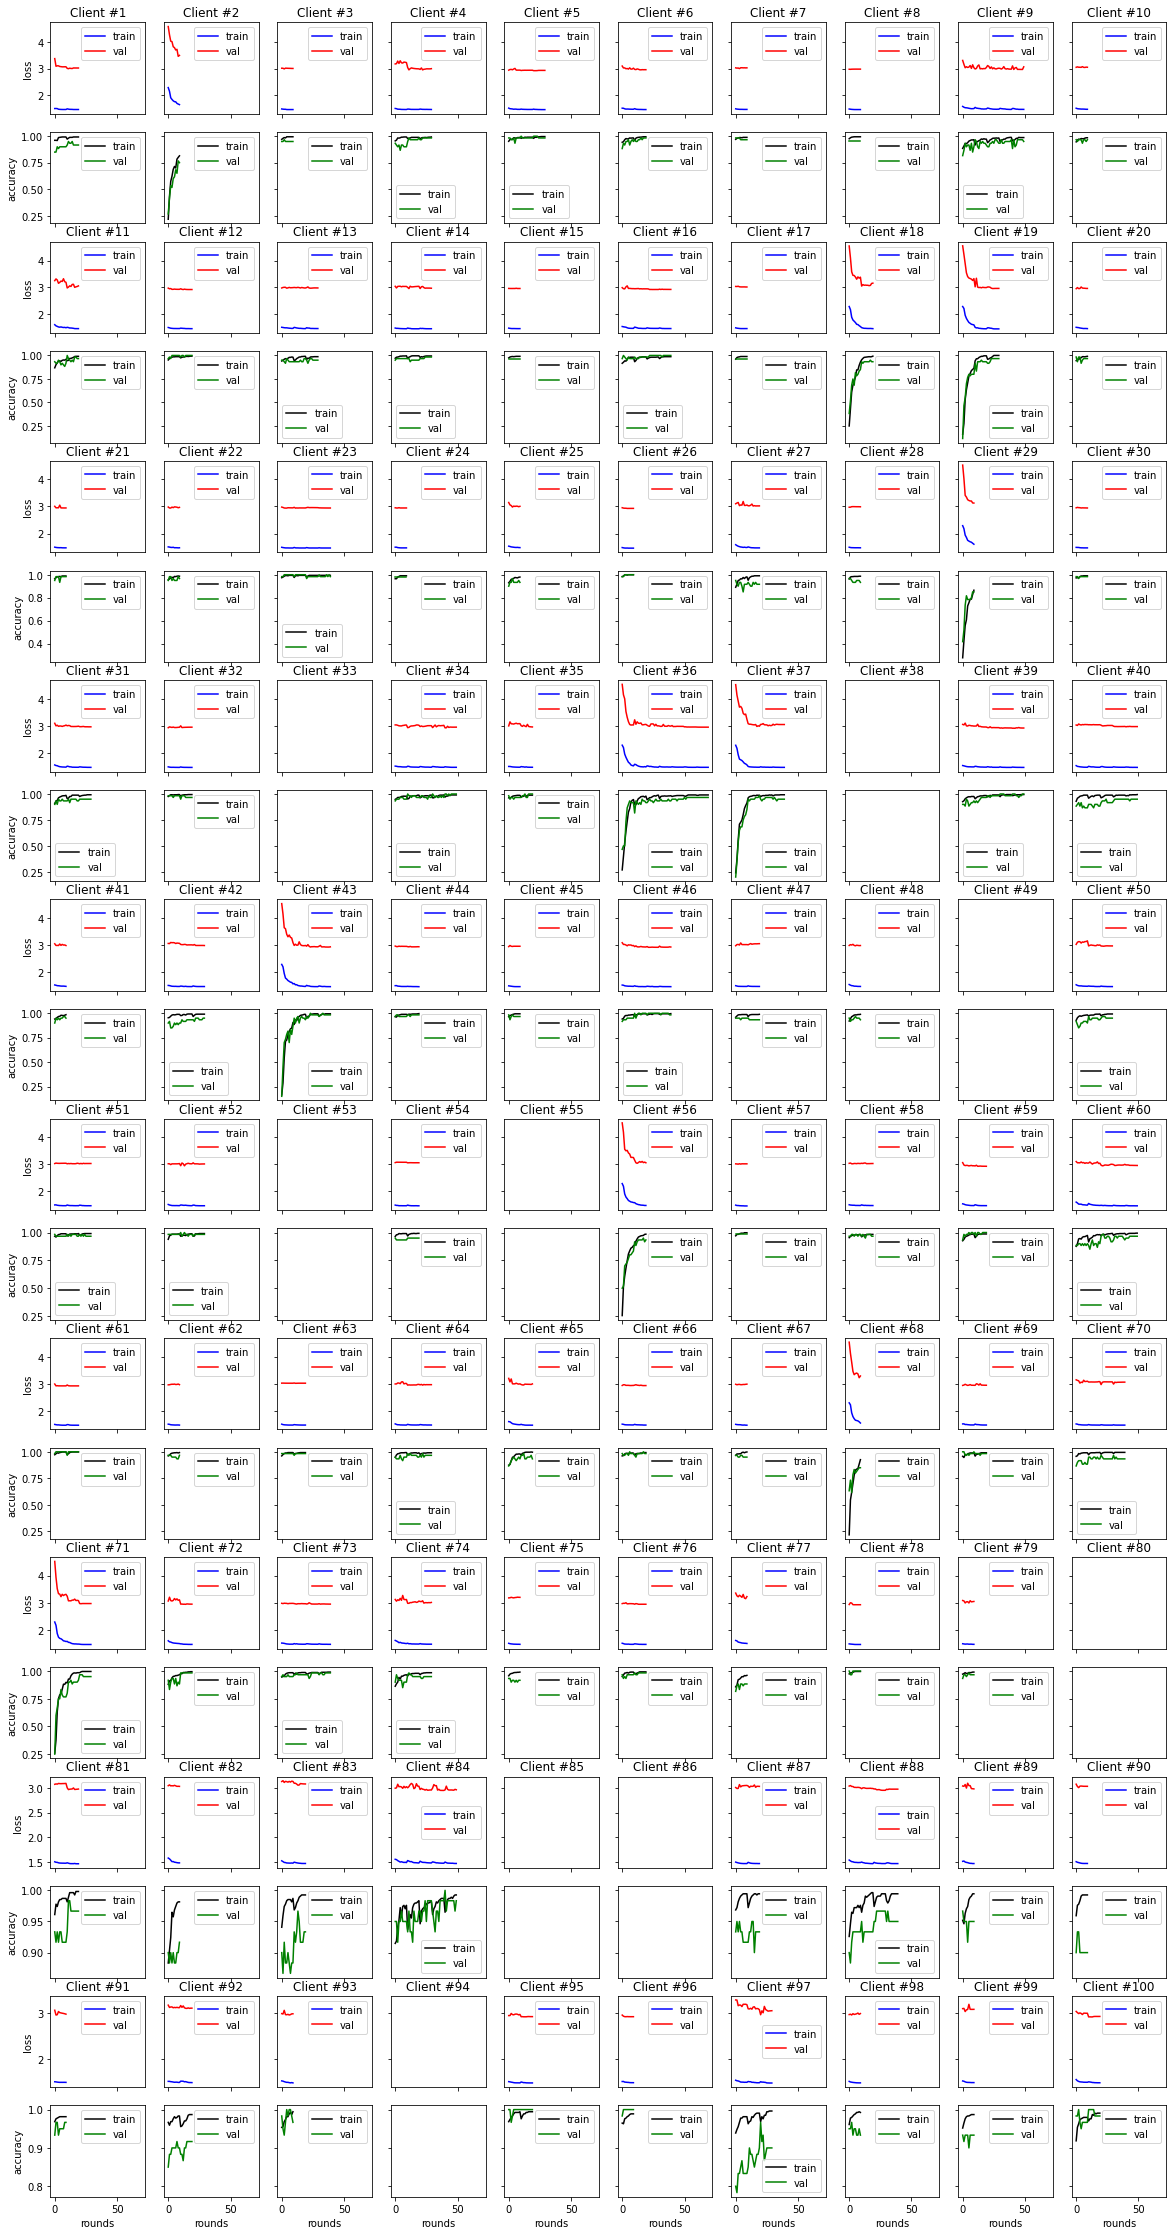

In [18]:
fed_avg.plot()

### <font color='#EC994B'>Fed ADMM</font>

In [37]:
fed_admm = FedAdmm_Server(args)


Experimental details:
    Model     : Model1
    Optimizer : sgd
    Global Rounds   : None

    Federated parameters:
    IID
    dataset            : mnist
    Num of users       : 100
    Fraction of users  : None
    Learning  Rate     : 0.1
    rho                : 0.1
    Local Epochs       : 10
    Local Batch size   : 50

random seed = 2022

Model1(
  (conv): Sequential(
    (0): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
    (2): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (3): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  )
  (linear): Sequential(
    (0): Linear(in_features=3136, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=10, bias=True)
    (3): Softmax(dim=None)
  )
)


In [38]:
fed_admm.run(frac,rounds)

  0%|          | 0/20 [00:00<?, ?it/s]


 | Global Training Round : 1 |

 | # 1: 28 |
| Local Epoch :  1 | Train Loss: 2.291 | Train Acc: 27.22% | Val Loss: 4.534 | Val Acc: 40.00% |
| Local Epoch : 10 | Train Loss: 1.670 | Train Acc: 84.26% | Val Loss: 3.164 | Val Acc: 86.67% |
 | # 2: 42 |
| Local Epoch :  1 | Train Loss: 2.292 | Train Acc: 16.48% | Val Loss: 4.552 | Val Acc: 15.00% |
| Local Epoch : 10 | Train Loss: 1.647 | Train Acc: 86.30% | Val Loss: 3.279 | Val Acc: 85.00% |
 | # 3: 70 |
| Local Epoch :  1 | Train Loss: 2.292 | Train Acc: 25.93% | Val Loss: 4.527 | Val Acc: 25.00% |
| Local Epoch : 10 | Train Loss: 1.654 | Train Acc: 85.00% | Val Loss: 3.351 | Val Acc: 78.33% |
 | # 4: 35 |
| Local Epoch :  1 | Train Loss: 2.294 | Train Acc: 26.67% | Val Loss: 4.560 | Val Acc: 45.00% |
| Local Epoch : 10 | Train Loss: 1.632 | Train Acc: 86.85% | Val Loss: 3.357 | Val Acc: 85.00% |
 | # 5: 36 |
| Local Epoch :  1 | Train Loss: 2.291 | Train Acc: 24.07% | Val Loss: 4.550 | Val Acc: 20.00% |
| Local Epoch : 10 | Train Lo

  5%|▌         | 1/20 [00:30<09:41, 30.58s/it]


test accuracy:84.13%

 
Avg Training Stats after 1 global rounds:
Training Loss : 1.858

 | Global Training Round : 2 |

 | # 1: 73 |
| Local Epoch :  1 | Train Loss: 1.675 | Train Acc: 82.41% | Val Loss: 3.189 | Val Acc: 86.67% |
| Local Epoch : 10 | Train Loss: 1.565 | Train Acc: 92.04% | Val Loss: 3.036 | Val Acc: 95.00% |
 | # 2: 26 |
| Local Epoch :  1 | Train Loss: 1.644 | Train Acc: 86.30% | Val Loss: 3.217 | Val Acc: 91.67% |
| Local Epoch : 10 | Train Loss: 1.526 | Train Acc: 95.19% | Val Loss: 3.103 | Val Acc: 91.67% |
 | # 3: 76 |
| Local Epoch :  1 | Train Loss: 1.648 | Train Acc: 85.93% | Val Loss: 3.411 | Val Acc: 78.33% |
| Local Epoch : 10 | Train Loss: 1.549 | Train Acc: 92.78% | Val Loss: 3.298 | Val Acc: 88.33% |
 | # 4: 70 |
| Local Epoch :  1 | Train Loss: 1.635 | Train Acc: 88.15% | Val Loss: 3.276 | Val Acc: 83.33% |
| Local Epoch : 10 | Train Loss: 1.576 | Train Acc: 93.89% | Val Loss: 3.287 | Val Acc: 80.00% |
 | # 5: 59 |
| Local Epoch :  1 | Train Loss: 1.66

 10%|█         | 2/20 [01:02<09:23, 31.30s/it]


test accuracy:93.10%

 
Avg Training Stats after 2 global rounds:
Training Loss : 1.720

 | Global Training Round : 3 |

 | # 1: 15 |
| Local Epoch :  1 | Train Loss: 1.577 | Train Acc: 90.56% | Val Loss: 3.125 | Val Acc: 96.67% |
| Local Epoch : 10 | Train Loss: 1.507 | Train Acc: 96.30% | Val Loss: 3.088 | Val Acc: 96.67% |
 | # 2:  8 |
| Local Epoch :  1 | Train Loss: 1.610 | Train Acc: 88.33% | Val Loss: 3.139 | Val Acc: 91.67% |
| Local Epoch : 10 | Train Loss: 1.553 | Train Acc: 91.85% | Val Loss: 3.165 | Val Acc: 85.00% |
 | # 3: 49 |
| Local Epoch :  1 | Train Loss: 1.564 | Train Acc: 92.04% | Val Loss: 3.136 | Val Acc: 86.67% |
| Local Epoch : 10 | Train Loss: 1.510 | Train Acc: 96.48% | Val Loss: 3.051 | Val Acc: 93.33% |
 | # 4: 87 |
| Local Epoch :  1 | Train Loss: 1.569 | Train Acc: 91.85% | Val Loss: 3.082 | Val Acc: 90.00% |
| Local Epoch : 10 | Train Loss: 1.518 | Train Acc: 95.93% | Val Loss: 3.147 | Val Acc: 86.67% |
 | # 5: 30 |
| Local Epoch :  1 | Train Loss: 1.58

 15%|█▌        | 3/20 [01:33<08:54, 31.43s/it]


test accuracy:94.11%

 
Avg Training Stats after 3 global rounds:
Training Loss : 1.663

 | Global Training Round : 4 |

 | # 1: 15 |
| Local Epoch :  1 | Train Loss: 1.554 | Train Acc: 91.48% | Val Loss: 2.986 | Val Acc: 98.33% |
| Local Epoch : 10 | Train Loss: 1.531 | Train Acc: 94.26% | Val Loss: 3.011 | Val Acc: 96.67% |
 | # 2: 47 |
| Local Epoch :  1 | Train Loss: 1.567 | Train Acc: 90.93% | Val Loss: 3.110 | Val Acc: 93.33% |
| Local Epoch : 10 | Train Loss: 1.499 | Train Acc: 97.41% | Val Loss: 3.078 | Val Acc: 93.33% |
 | # 3: 38 |
| Local Epoch :  1 | Train Loss: 1.558 | Train Acc: 91.67% | Val Loss: 3.043 | Val Acc: 91.67% |
| Local Epoch : 10 | Train Loss: 1.502 | Train Acc: 96.85% | Val Loss: 3.047 | Val Acc: 91.67% |
 | # 4: 96 |
| Local Epoch :  1 | Train Loss: 1.552 | Train Acc: 92.96% | Val Loss: 3.291 | Val Acc: 78.33% |
| Local Epoch : 10 | Train Loss: 1.500 | Train Acc: 97.04% | Val Loss: 3.299 | Val Acc: 80.00% |
 | # 5: 39 |
| Local Epoch :  1 | Train Loss: 1.55

 20%|██        | 4/20 [02:04<08:15, 30.96s/it]


test accuracy:94.81%

 
Avg Training Stats after 4 global rounds:
Training Loss : 1.627

 | Global Training Round : 5 |

 | # 1: 24 |
| Local Epoch :  1 | Train Loss: 1.541 | Train Acc: 92.96% | Val Loss: 3.015 | Val Acc: 93.33% |
| Local Epoch : 10 | Train Loss: 1.495 | Train Acc: 97.59% | Val Loss: 3.001 | Val Acc: 96.67% |
 | # 2: 40 |
| Local Epoch :  1 | Train Loss: 1.542 | Train Acc: 92.41% | Val Loss: 3.018 | Val Acc: 95.00% |
| Local Epoch : 10 | Train Loss: 1.492 | Train Acc: 97.96% | Val Loss: 3.006 | Val Acc: 96.67% |
 | # 3:  8 |
| Local Epoch :  1 | Train Loss: 1.581 | Train Acc: 89.81% | Val Loss: 3.055 | Val Acc: 91.67% |
| Local Epoch : 10 | Train Loss: 1.542 | Train Acc: 92.78% | Val Loss: 3.088 | Val Acc: 90.00% |
 | # 4: 43 |
| Local Epoch :  1 | Train Loss: 1.516 | Train Acc: 95.19% | Val Loss: 3.006 | Val Acc: 95.00% |
| Local Epoch : 10 | Train Loss: 1.477 | Train Acc: 99.07% | Val Loss: 2.965 | Val Acc: 98.33% |
 | # 5: 41 |
| Local Epoch :  1 | Train Loss: 1.52

 25%|██▌       | 5/20 [02:35<07:45, 31.05s/it]


test accuracy:95.49%

 
Avg Training Stats after 5 global rounds:
Training Loss : 1.605

 | Global Training Round : 6 |

 | # 1: 10 |
| Local Epoch :  1 | Train Loss: 1.540 | Train Acc: 92.96% | Val Loss: 3.062 | Val Acc: 96.67% |
| Local Epoch : 10 | Train Loss: 1.509 | Train Acc: 97.59% | Val Loss: 3.131 | Val Acc: 96.67% |
 | # 2: 63 |
| Local Epoch :  1 | Train Loss: 1.520 | Train Acc: 94.63% | Val Loss: 3.134 | Val Acc: 91.67% |
| Local Epoch : 10 | Train Loss: 1.480 | Train Acc: 98.70% | Val Loss: 3.111 | Val Acc: 86.67% |
 | # 3: 80 |
| Local Epoch :  1 | Train Loss: 1.531 | Train Acc: 94.26% | Val Loss: 3.121 | Val Acc: 91.67% |
| Local Epoch : 10 | Train Loss: 1.480 | Train Acc: 98.70% | Val Loss: 3.101 | Val Acc: 91.67% |
 | # 4: 38 |
| Local Epoch :  1 | Train Loss: 1.539 | Train Acc: 92.96% | Val Loss: 2.979 | Val Acc: 98.33% |
| Local Epoch : 10 | Train Loss: 1.512 | Train Acc: 96.30% | Val Loss: 2.960 | Val Acc: 98.33% |
 | # 5: 82 |
| Local Epoch :  1 | Train Loss: 1.53

 30%|███       | 6/20 [03:07<07:21, 31.52s/it]


test accuracy:95.55%

 
Avg Training Stats after 6 global rounds:
Training Loss : 1.589

 | Global Training Round : 7 |

 | # 1: 12 |
| Local Epoch :  1 | Train Loss: 1.527 | Train Acc: 93.89% | Val Loss: 2.994 | Val Acc: 95.00% |
| Local Epoch : 10 | Train Loss: 1.526 | Train Acc: 94.26% | Val Loss: 2.998 | Val Acc: 95.00% |
 | # 2: 51 |
| Local Epoch :  1 | Train Loss: 1.531 | Train Acc: 93.52% | Val Loss: 3.151 | Val Acc: 88.33% |
| Local Epoch : 10 | Train Loss: 1.490 | Train Acc: 97.78% | Val Loss: 3.086 | Val Acc: 96.67% |
 | # 3: 98 |
| Local Epoch :  1 | Train Loss: 1.529 | Train Acc: 94.26% | Val Loss: 3.186 | Val Acc: 91.67% |
| Local Epoch : 10 | Train Loss: 1.491 | Train Acc: 97.96% | Val Loss: 3.146 | Val Acc: 90.00% |
 | # 4: 13 |
| Local Epoch :  1 | Train Loss: 1.505 | Train Acc: 96.30% | Val Loss: 3.075 | Val Acc: 93.33% |
| Local Epoch : 10 | Train Loss: 1.497 | Train Acc: 97.22% | Val Loss: 3.058 | Val Acc: 95.00% |
 | # 5: 33 |
| Local Epoch :  1 | Train Loss: 1.52

 35%|███▌      | 7/20 [03:38<06:48, 31.39s/it]


test accuracy:95.90%

 
Avg Training Stats after 7 global rounds:
Training Loss : 1.578

 | Global Training Round : 8 |

 | # 1: 57 |
| Local Epoch :  1 | Train Loss: 1.521 | Train Acc: 94.44% | Val Loss: 3.092 | Val Acc: 93.33% |
| Local Epoch : 10 | Train Loss: 1.499 | Train Acc: 96.67% | Val Loss: 3.047 | Val Acc: 96.67% |
 | # 2:  3 |
| Local Epoch :  1 | Train Loss: 1.527 | Train Acc: 94.07% | Val Loss: 3.237 | Val Acc: 90.00% |
| Local Epoch : 10 | Train Loss: 1.481 | Train Acc: 98.70% | Val Loss: 3.152 | Val Acc: 93.33% |
 | # 3: 36 |
| Local Epoch :  1 | Train Loss: 1.519 | Train Acc: 95.56% | Val Loss: 3.107 | Val Acc: 93.33% |
| Local Epoch : 10 | Train Loss: 1.499 | Train Acc: 98.89% | Val Loss: 3.078 | Val Acc: 93.33% |
 | # 4: 68 |
| Local Epoch :  1 | Train Loss: 1.537 | Train Acc: 92.96% | Val Loss: 3.039 | Val Acc: 95.00% |
| Local Epoch : 10 | Train Loss: 1.489 | Train Acc: 98.15% | Val Loss: 3.036 | Val Acc: 93.33% |
 | # 5: 19 |
| Local Epoch :  1 | Train Loss: 1.54

 40%|████      | 8/20 [04:09<06:13, 31.14s/it]


test accuracy:96.36%

 
Avg Training Stats after 8 global rounds:
Training Loss : 1.569

 | Global Training Round : 9 |

 | # 1: 50 |
| Local Epoch :  1 | Train Loss: 1.524 | Train Acc: 94.44% | Val Loss: 3.061 | Val Acc: 96.67% |
| Local Epoch : 10 | Train Loss: 1.480 | Train Acc: 98.70% | Val Loss: 3.068 | Val Acc: 96.67% |
 | # 2: 89 |
| Local Epoch :  1 | Train Loss: 1.521 | Train Acc: 94.81% | Val Loss: 3.042 | Val Acc: 91.67% |
| Local Epoch : 10 | Train Loss: 1.475 | Train Acc: 99.44% | Val Loss: 3.036 | Val Acc: 90.00% |
 | # 3: 91 |
| Local Epoch :  1 | Train Loss: 1.529 | Train Acc: 94.07% | Val Loss: 3.212 | Val Acc: 83.33% |
| Local Epoch : 10 | Train Loss: 1.482 | Train Acc: 98.52% | Val Loss: 3.133 | Val Acc: 88.33% |
 | # 4: 12 |
| Local Epoch :  1 | Train Loss: 1.523 | Train Acc: 94.26% | Val Loss: 3.024 | Val Acc: 93.33% |
| Local Epoch : 10 | Train Loss: 1.504 | Train Acc: 96.67% | Val Loss: 2.992 | Val Acc: 96.67% |
 | # 5: 68 |
| Local Epoch :  1 | Train Loss: 1.52

 45%|████▌     | 9/20 [04:41<05:44, 31.31s/it]


test accuracy:96.61%

 
Avg Training Stats after 9 global rounds:
Training Loss : 1.562

 | Global Training Round : 10 |

 | # 1: 18 |
| Local Epoch :  1 | Train Loss: 1.547 | Train Acc: 92.04% | Val Loss: 3.046 | Val Acc: 90.00% |
| Local Epoch : 10 | Train Loss: 1.505 | Train Acc: 98.70% | Val Loss: 3.043 | Val Acc: 93.33% |
 | # 2: 91 |
| Local Epoch :  1 | Train Loss: 1.524 | Train Acc: 95.00% | Val Loss: 3.128 | Val Acc: 91.67% |
| Local Epoch : 10 | Train Loss: 1.504 | Train Acc: 96.48% | Val Loss: 3.167 | Val Acc: 86.67% |
 | # 3:  8 |
| Local Epoch :  1 | Train Loss: 1.551 | Train Acc: 91.30% | Val Loss: 3.093 | Val Acc: 90.00% |
| Local Epoch : 10 | Train Loss: 1.536 | Train Acc: 93.52% | Val Loss: 3.142 | Val Acc: 91.67% |
 | # 4: 45 |
| Local Epoch :  1 | Train Loss: 1.522 | Train Acc: 95.00% | Val Loss: 3.004 | Val Acc: 96.67% |
| Local Epoch : 10 | Train Loss: 1.496 | Train Acc: 98.33% | Val Loss: 2.953 | Val Acc: 100.00% |
 | # 5: 64 |
| Local Epoch :  1 | Train Loss: 1.

 50%|█████     | 10/20 [05:12<05:13, 31.32s/it]


test accuracy:96.68%

 
Avg Training Stats after 10 global rounds:
Training Loss : 1.556

 | Global Training Round : 11 |

 | # 1: 38 |
| Local Epoch :  1 | Train Loss: 1.536 | Train Acc: 93.70% | Val Loss: 3.004 | Val Acc: 95.00% |
| Local Epoch : 10 | Train Loss: 1.499 | Train Acc: 97.22% | Val Loss: 3.050 | Val Acc: 95.00% |
 | # 2: 65 |
| Local Epoch :  1 | Train Loss: 1.513 | Train Acc: 95.19% | Val Loss: 2.971 | Val Acc: 98.33% |
| Local Epoch : 10 | Train Loss: 1.479 | Train Acc: 98.89% | Val Loss: 2.958 | Val Acc: 98.33% |
 | # 3: 60 |
| Local Epoch :  1 | Train Loss: 1.513 | Train Acc: 95.93% | Val Loss: 2.983 | Val Acc: 96.67% |
| Local Epoch : 10 | Train Loss: 1.474 | Train Acc: 99.44% | Val Loss: 2.936 | Val Acc: 100.00% |
 | # 4: 95 |
| Local Epoch :  1 | Train Loss: 1.504 | Train Acc: 96.85% | Val Loss: 2.977 | Val Acc: 98.33% |
| Local Epoch : 10 | Train Loss: 1.478 | Train Acc: 98.89% | Val Loss: 2.936 | Val Acc: 100.00% |
 | # 5: 50 |
| Local Epoch :  1 | Train Loss: 

 55%|█████▌    | 11/20 [05:43<04:39, 31.08s/it]


test accuracy:96.83%

 
Avg Training Stats after 11 global rounds:
Training Loss : 1.550

 | Global Training Round : 12 |

 | # 1: 82 |
| Local Epoch :  1 | Train Loss: 1.513 | Train Acc: 95.19% | Val Loss: 3.116 | Val Acc: 91.67% |
| Local Epoch : 10 | Train Loss: 1.497 | Train Acc: 97.96% | Val Loss: 3.128 | Val Acc: 95.00% |
 | # 2: 73 |
| Local Epoch :  1 | Train Loss: 1.528 | Train Acc: 94.44% | Val Loss: 3.173 | Val Acc: 90.00% |
| Local Epoch : 10 | Train Loss: 1.505 | Train Acc: 97.96% | Val Loss: 3.017 | Val Acc: 96.67% |
 | # 3: 60 |
| Local Epoch :  1 | Train Loss: 1.510 | Train Acc: 95.93% | Val Loss: 2.948 | Val Acc: 98.33% |
| Local Epoch : 10 | Train Loss: 1.497 | Train Acc: 97.22% | Val Loss: 2.929 | Val Acc: 100.00% |
 | # 4: 58 |
| Local Epoch :  1 | Train Loss: 1.538 | Train Acc: 93.70% | Val Loss: 3.003 | Val Acc: 96.67% |
| Local Epoch : 10 | Train Loss: 1.529 | Train Acc: 94.26% | Val Loss: 2.959 | Val Acc: 98.33% |
 | # 5:  8 |
| Local Epoch :  1 | Train Loss: 1

 60%|██████    | 12/20 [06:14<04:08, 31.12s/it]


test accuracy:96.86%

 
Avg Training Stats after 12 global rounds:
Training Loss : 1.547

 | Global Training Round : 13 |

 | # 1: 78 |
| Local Epoch :  1 | Train Loss: 1.512 | Train Acc: 95.74% | Val Loss: 3.155 | Val Acc: 93.33% |
| Local Epoch : 10 | Train Loss: 1.475 | Train Acc: 99.26% | Val Loss: 3.077 | Val Acc: 96.67% |
 | # 2: 83 |
| Local Epoch :  1 | Train Loss: 1.523 | Train Acc: 95.19% | Val Loss: 2.993 | Val Acc: 95.00% |
| Local Epoch : 10 | Train Loss: 1.514 | Train Acc: 95.74% | Val Loss: 3.023 | Val Acc: 96.67% |
 | # 3: 53 |
| Local Epoch :  1 | Train Loss: 1.512 | Train Acc: 95.93% | Val Loss: 3.064 | Val Acc: 95.00% |
| Local Epoch : 10 | Train Loss: 1.480 | Train Acc: 98.89% | Val Loss: 3.076 | Val Acc: 93.33% |
 | # 4: 63 |
| Local Epoch :  1 | Train Loss: 1.506 | Train Acc: 96.30% | Val Loss: 3.004 | Val Acc: 95.00% |
| Local Epoch : 10 | Train Loss: 1.488 | Train Acc: 97.96% | Val Loss: 2.992 | Val Acc: 96.67% |
 | # 5: 35 |
| Local Epoch :  1 | Train Loss: 1.

 65%|██████▌   | 13/20 [06:46<03:40, 31.52s/it]


test accuracy:97.03%

 
Avg Training Stats after 13 global rounds:
Training Loss : 1.543

 | Global Training Round : 14 |

 | # 1: 65 |
| Local Epoch :  1 | Train Loss: 1.504 | Train Acc: 96.67% | Val Loss: 2.971 | Val Acc: 98.33% |
| Local Epoch : 10 | Train Loss: 1.487 | Train Acc: 98.15% | Val Loss: 2.948 | Val Acc: 100.00% |
 | # 2: 75 |
| Local Epoch :  1 | Train Loss: 1.517 | Train Acc: 95.19% | Val Loss: 2.989 | Val Acc: 96.67% |
| Local Epoch : 10 | Train Loss: 1.479 | Train Acc: 99.07% | Val Loss: 2.946 | Val Acc: 98.33% |
 | # 3: 50 |
| Local Epoch :  1 | Train Loss: 1.519 | Train Acc: 94.81% | Val Loss: 3.098 | Val Acc: 96.67% |
| Local Epoch : 10 | Train Loss: 1.503 | Train Acc: 97.04% | Val Loss: 3.066 | Val Acc: 96.67% |
 | # 4: 33 |
| Local Epoch :  1 | Train Loss: 1.514 | Train Acc: 95.93% | Val Loss: 2.985 | Val Acc: 98.33% |
| Local Epoch : 10 | Train Loss: 1.509 | Train Acc: 96.48% | Val Loss: 3.034 | Val Acc: 95.00% |
 | # 5: 46 |
| Local Epoch :  1 | Train Loss: 1

 70%|███████   | 14/20 [07:17<03:07, 31.22s/it]


test accuracy:96.91%

 
Avg Training Stats after 14 global rounds:
Training Loss : 1.540

 | Global Training Round : 15 |

 | # 1:  7 |
| Local Epoch :  1 | Train Loss: 1.497 | Train Acc: 97.59% | Val Loss: 3.014 | Val Acc: 96.67% |
| Local Epoch : 10 | Train Loss: 1.470 | Train Acc: 99.63% | Val Loss: 2.965 | Val Acc: 96.67% |
 | # 2: 77 |
| Local Epoch :  1 | Train Loss: 1.501 | Train Acc: 97.59% | Val Loss: 2.995 | Val Acc: 98.33% |
| Local Epoch : 10 | Train Loss: 1.473 | Train Acc: 99.26% | Val Loss: 2.994 | Val Acc: 98.33% |
 | # 3: 90 |
| Local Epoch :  1 | Train Loss: 1.509 | Train Acc: 96.30% | Val Loss: 3.137 | Val Acc: 91.67% |
| Local Epoch : 10 | Train Loss: 1.480 | Train Acc: 98.70% | Val Loss: 2.985 | Val Acc: 95.00% |
 | # 4: 86 |
| Local Epoch :  1 | Train Loss: 1.508 | Train Acc: 95.93% | Val Loss: 3.069 | Val Acc: 93.33% |
| Local Epoch : 10 | Train Loss: 1.475 | Train Acc: 99.07% | Val Loss: 3.021 | Val Acc: 93.33% |
 | # 5: 42 |
| Local Epoch :  1 | Train Loss: 1.

 75%|███████▌  | 15/20 [07:48<02:35, 31.17s/it]


test accuracy:97.27%

 
Avg Training Stats after 15 global rounds:
Training Loss : 1.536

 | Global Training Round : 16 |

 | # 1: 46 |
| Local Epoch :  1 | Train Loss: 1.507 | Train Acc: 95.74% | Val Loss: 3.006 | Val Acc: 95.00% |
| Local Epoch : 10 | Train Loss: 1.492 | Train Acc: 97.22% | Val Loss: 3.054 | Val Acc: 91.67% |
 | # 2: 51 |
| Local Epoch :  1 | Train Loss: 1.513 | Train Acc: 96.11% | Val Loss: 3.070 | Val Acc: 96.67% |
| Local Epoch : 10 | Train Loss: 1.503 | Train Acc: 96.48% | Val Loss: 3.042 | Val Acc: 95.00% |
 | # 3: 69 |
| Local Epoch :  1 | Train Loss: 1.499 | Train Acc: 97.22% | Val Loss: 3.082 | Val Acc: 96.67% |
| Local Epoch : 10 | Train Loss: 1.484 | Train Acc: 98.52% | Val Loss: 2.996 | Val Acc: 96.67% |
 | # 4: 30 |
| Local Epoch :  1 | Train Loss: 1.508 | Train Acc: 95.93% | Val Loss: 3.005 | Val Acc: 95.00% |
| Local Epoch : 10 | Train Loss: 1.496 | Train Acc: 97.41% | Val Loss: 3.042 | Val Acc: 91.67% |
 | # 5: 34 |
| Local Epoch :  1 | Train Loss: 1.

 80%|████████  | 16/20 [08:19<02:04, 31.21s/it]


test accuracy:97.21%

 
Avg Training Stats after 16 global rounds:
Training Loss : 1.534

 | Global Training Round : 17 |

 | # 1: 69 |
| Local Epoch :  1 | Train Loss: 1.496 | Train Acc: 97.04% | Val Loss: 3.072 | Val Acc: 95.00% |
| Local Epoch : 10 | Train Loss: 1.494 | Train Acc: 97.78% | Val Loss: 2.997 | Val Acc: 95.00% |
 | # 2: 59 |
| Local Epoch :  1 | Train Loss: 1.507 | Train Acc: 96.11% | Val Loss: 2.982 | Val Acc: 95.00% |
| Local Epoch : 10 | Train Loss: 1.502 | Train Acc: 97.59% | Val Loss: 3.001 | Val Acc: 93.33% |
 | # 3: 23 |
| Local Epoch :  1 | Train Loss: 1.509 | Train Acc: 95.74% | Val Loss: 2.973 | Val Acc: 96.67% |
| Local Epoch : 10 | Train Loss: 1.477 | Train Acc: 99.07% | Val Loss: 2.962 | Val Acc: 96.67% |
 | # 4: 21 |
| Local Epoch :  1 | Train Loss: 1.515 | Train Acc: 95.00% | Val Loss: 2.979 | Val Acc: 95.00% |
| Local Epoch : 10 | Train Loss: 1.482 | Train Acc: 98.70% | Val Loss: 2.948 | Val Acc: 98.33% |
 | # 5: 38 |
| Local Epoch :  1 | Train Loss: 1.

 85%|████████▌ | 17/20 [08:50<01:33, 31.03s/it]


test accuracy:97.38%

 
Avg Training Stats after 17 global rounds:
Training Loss : 1.532

 | Global Training Round : 18 |

 | # 1: 25 |
| Local Epoch :  1 | Train Loss: 1.488 | Train Acc: 97.96% | Val Loss: 3.017 | Val Acc: 98.33% |
| Local Epoch : 10 | Train Loss: 1.468 | Train Acc: 99.63% | Val Loss: 2.974 | Val Acc: 98.33% |
 | # 2:  3 |
| Local Epoch :  1 | Train Loss: 1.503 | Train Acc: 97.04% | Val Loss: 3.142 | Val Acc: 93.33% |
| Local Epoch : 10 | Train Loss: 1.487 | Train Acc: 98.15% | Val Loss: 3.123 | Val Acc: 96.67% |
 | # 3: 53 |
| Local Epoch :  1 | Train Loss: 1.499 | Train Acc: 97.04% | Val Loss: 3.060 | Val Acc: 95.00% |
| Local Epoch : 10 | Train Loss: 1.487 | Train Acc: 97.96% | Val Loss: 3.074 | Val Acc: 93.33% |
 | # 4: 11 |
| Local Epoch :  1 | Train Loss: 1.513 | Train Acc: 95.74% | Val Loss: 2.946 | Val Acc: 100.00% |
| Local Epoch : 10 | Train Loss: 1.495 | Train Acc: 97.41% | Val Loss: 2.981 | Val Acc: 96.67% |
 | # 5: 59 |
| Local Epoch :  1 | Train Loss: 1

 90%|█████████ | 18/20 [09:21<01:02, 31.07s/it]


test accuracy:97.20%

 
Avg Training Stats after 18 global rounds:
Training Loss : 1.530

 | Global Training Round : 19 |

 | # 1: 87 |
| Local Epoch :  1 | Train Loss: 1.501 | Train Acc: 96.85% | Val Loss: 3.048 | Val Acc: 93.33% |
| Local Epoch : 10 | Train Loss: 1.495 | Train Acc: 97.59% | Val Loss: 2.979 | Val Acc: 95.00% |
 | # 2: 72 |
| Local Epoch :  1 | Train Loss: 1.525 | Train Acc: 94.07% | Val Loss: 2.983 | Val Acc: 96.67% |
| Local Epoch : 10 | Train Loss: 1.527 | Train Acc: 94.26% | Val Loss: 2.992 | Val Acc: 96.67% |
 | # 3: 36 |
| Local Epoch :  1 | Train Loss: 1.500 | Train Acc: 97.04% | Val Loss: 3.086 | Val Acc: 93.33% |
| Local Epoch : 10 | Train Loss: 1.491 | Train Acc: 98.70% | Val Loss: 3.093 | Val Acc: 95.00% |
 | # 4: 44 |
| Local Epoch :  1 | Train Loss: 1.507 | Train Acc: 95.93% | Val Loss: 2.985 | Val Acc: 96.67% |
| Local Epoch : 10 | Train Loss: 1.479 | Train Acc: 98.52% | Val Loss: 3.002 | Val Acc: 95.00% |
 | # 5: 33 |
| Local Epoch :  1 | Train Loss: 1.

 95%|█████████▌| 19/20 [09:52<00:31, 31.20s/it]


test accuracy:97.46%

 
Avg Training Stats after 19 global rounds:
Training Loss : 1.528

 | Global Training Round : 20 |

 | # 1: 70 |
| Local Epoch :  1 | Train Loss: 1.495 | Train Acc: 97.96% | Val Loss: 2.991 | Val Acc: 95.00% |
| Local Epoch : 10 | Train Loss: 1.496 | Train Acc: 99.44% | Val Loss: 3.005 | Val Acc: 95.00% |
 | # 2: 99 |
| Local Epoch :  1 | Train Loss: 1.506 | Train Acc: 95.93% | Val Loss: 2.944 | Val Acc: 98.33% |
| Local Epoch : 10 | Train Loss: 1.483 | Train Acc: 98.70% | Val Loss: 2.977 | Val Acc: 100.00% |
 | # 3: 96 |
| Local Epoch :  1 | Train Loss: 1.508 | Train Acc: 96.11% | Val Loss: 3.085 | Val Acc: 88.33% |
| Local Epoch : 10 | Train Loss: 1.497 | Train Acc: 97.22% | Val Loss: 3.118 | Val Acc: 90.00% |
 | # 4: 38 |
| Local Epoch :  1 | Train Loss: 1.504 | Train Acc: 96.48% | Val Loss: 2.966 | Val Acc: 96.67% |
| Local Epoch : 10 | Train Loss: 1.507 | Train Acc: 96.30% | Val Loss: 3.031 | Val Acc: 98.33% |
 | # 5: 29 |
| Local Epoch :  1 | Train Loss: 1

100%|██████████| 20/20 [10:24<00:00, 31.21s/it]


test accuracy:97.47%

 
Avg Training Stats after 20 global rounds:
Training Loss : 1.526

 Total Run Time: 624.1292
 
 Results after 20 global rounds of training:
|---- Test Accuracy: 97.47%


#### Plot

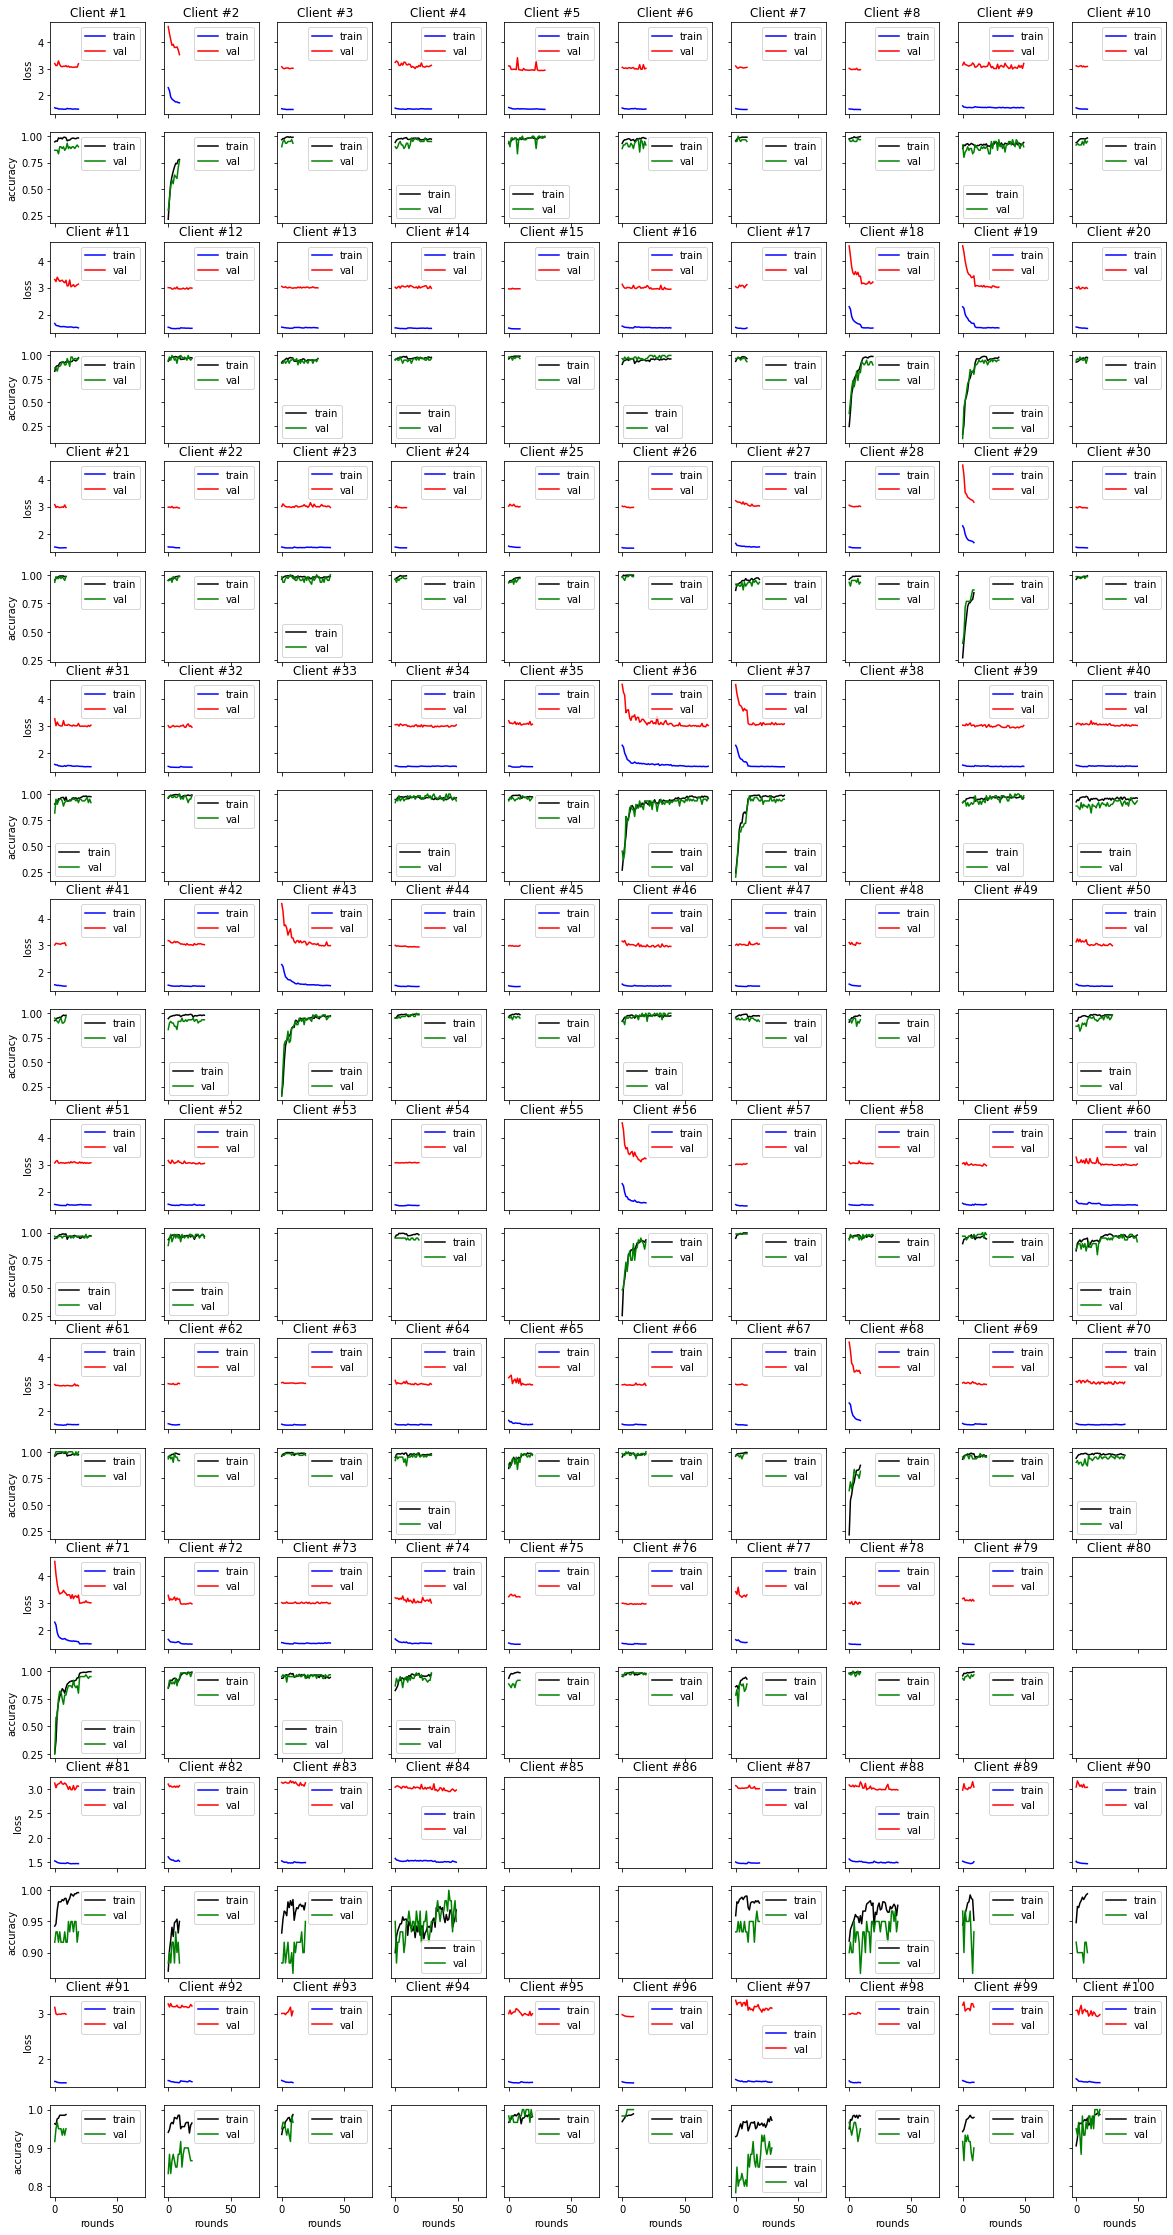

In [39]:
fed_admm.plot()

### <font color='#EC994B'>Fed Prox</font>

In [12]:
fed_prox = FedProx_Server(args)


Experimental details:
    Model     : Model1
    Optimizer : sgd
    Global Rounds   : None

    Federated parameters:
    IID
    dataset            : mnist
    Num of users       : 100
    Fraction of users  : None
    Learning  Rate     : 0.1
    rho                : 0.1
    Local Epochs       : 10
    Local Batch size   : 50

random seed = 2022

Model1(
  (conv): Sequential(
    (0): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
    (2): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (3): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  )
  (linear): Sequential(
    (0): Linear(in_features=3136, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=10, bias=True)
    (3): Softmax(dim=None)
  )
)


In [13]:
fed_prox.run(frac,rounds)

  0%|          | 0/20 [00:00<?, ?it/s]


 | Global Training Round : 1 |

 | # 1: 28 |
| Local Epoch :  1 | Train Loss: 2.291 | Train Acc: 27.22% | Val Loss: 4.534 | Val Acc: 40.00% |
| Local Epoch : 10 | Train Loss: 1.670 | Train Acc: 84.26% | Val Loss: 3.164 | Val Acc: 86.67% |
 | # 2: 42 |
| Local Epoch :  1 | Train Loss: 2.292 | Train Acc: 16.48% | Val Loss: 4.552 | Val Acc: 15.00% |
| Local Epoch : 10 | Train Loss: 1.647 | Train Acc: 86.30% | Val Loss: 3.279 | Val Acc: 85.00% |
 | # 3: 70 |
| Local Epoch :  1 | Train Loss: 2.292 | Train Acc: 25.93% | Val Loss: 4.527 | Val Acc: 25.00% |
| Local Epoch : 10 | Train Loss: 1.654 | Train Acc: 85.00% | Val Loss: 3.351 | Val Acc: 78.33% |
 | # 4: 35 |
| Local Epoch :  1 | Train Loss: 2.294 | Train Acc: 26.67% | Val Loss: 4.560 | Val Acc: 45.00% |
| Local Epoch : 10 | Train Loss: 1.632 | Train Acc: 86.85% | Val Loss: 3.357 | Val Acc: 85.00% |
 | # 5: 36 |
| Local Epoch :  1 | Train Loss: 2.291 | Train Acc: 24.07% | Val Loss: 4.550 | Val Acc: 20.00% |
| Local Epoch : 10 | Train Lo

  5%|▌         | 1/20 [00:31<10:04, 31.79s/it]


test accuracy:84.13%

 
Avg Training Stats after 1 global rounds:
Training Loss : 1.858

 | Global Training Round : 2 |

 | # 1: 73 |
| Local Epoch :  1 | Train Loss: 1.675 | Train Acc: 82.41% | Val Loss: 3.189 | Val Acc: 86.67% |
| Local Epoch : 10 | Train Loss: 1.565 | Train Acc: 92.04% | Val Loss: 3.036 | Val Acc: 95.00% |
 | # 2: 26 |
| Local Epoch :  1 | Train Loss: 1.644 | Train Acc: 86.30% | Val Loss: 3.217 | Val Acc: 91.67% |
| Local Epoch : 10 | Train Loss: 1.526 | Train Acc: 95.19% | Val Loss: 3.103 | Val Acc: 91.67% |
 | # 3: 76 |
| Local Epoch :  1 | Train Loss: 1.648 | Train Acc: 85.93% | Val Loss: 3.411 | Val Acc: 78.33% |
| Local Epoch : 10 | Train Loss: 1.549 | Train Acc: 92.78% | Val Loss: 3.298 | Val Acc: 88.33% |
 | # 4: 70 |
| Local Epoch :  1 | Train Loss: 1.616 | Train Acc: 87.22% | Val Loss: 3.283 | Val Acc: 81.67% |
| Local Epoch : 10 | Train Loss: 1.525 | Train Acc: 95.93% | Val Loss: 3.222 | Val Acc: 88.33% |
 | # 5: 59 |
| Local Epoch :  1 | Train Loss: 1.66

 10%|█         | 2/20 [01:03<09:33, 31.86s/it]


test accuracy:93.14%

 
Avg Training Stats after 2 global rounds:
Training Loss : 1.712

 | Global Training Round : 3 |

 | # 1: 15 |
| Local Epoch :  1 | Train Loss: 1.574 | Train Acc: 90.93% | Val Loss: 3.067 | Val Acc: 96.67% |
| Local Epoch : 10 | Train Loss: 1.504 | Train Acc: 96.67% | Val Loss: 3.065 | Val Acc: 96.67% |
 | # 2:  8 |
| Local Epoch :  1 | Train Loss: 1.588 | Train Acc: 89.44% | Val Loss: 3.243 | Val Acc: 81.67% |
| Local Epoch : 10 | Train Loss: 1.540 | Train Acc: 93.15% | Val Loss: 3.253 | Val Acc: 83.33% |
 | # 3: 49 |
| Local Epoch :  1 | Train Loss: 1.554 | Train Acc: 92.78% | Val Loss: 3.124 | Val Acc: 86.67% |
| Local Epoch : 10 | Train Loss: 1.504 | Train Acc: 96.85% | Val Loss: 3.045 | Val Acc: 93.33% |
 | # 4: 87 |
| Local Epoch :  1 | Train Loss: 1.563 | Train Acc: 92.78% | Val Loss: 3.081 | Val Acc: 91.67% |
| Local Epoch : 10 | Train Loss: 1.510 | Train Acc: 96.11% | Val Loss: 3.040 | Val Acc: 93.33% |
 | # 5: 30 |
| Local Epoch :  1 | Train Loss: 1.57

 15%|█▌        | 3/20 [01:35<09:01, 31.88s/it]


test accuracy:94.26%

 
Avg Training Stats after 3 global rounds:
Training Loss : 1.651

 | Global Training Round : 4 |

 | # 1: 15 |
| Local Epoch :  1 | Train Loss: 1.542 | Train Acc: 91.85% | Val Loss: 2.989 | Val Acc: 96.67% |
| Local Epoch : 10 | Train Loss: 1.512 | Train Acc: 95.37% | Val Loss: 2.968 | Val Acc: 96.67% |
 | # 2: 47 |
| Local Epoch :  1 | Train Loss: 1.551 | Train Acc: 91.85% | Val Loss: 3.088 | Val Acc: 93.33% |
| Local Epoch : 10 | Train Loss: 1.498 | Train Acc: 96.85% | Val Loss: 3.108 | Val Acc: 88.33% |
 | # 3: 38 |
| Local Epoch :  1 | Train Loss: 1.547 | Train Acc: 92.41% | Val Loss: 3.073 | Val Acc: 88.33% |
| Local Epoch : 10 | Train Loss: 1.506 | Train Acc: 96.67% | Val Loss: 3.051 | Val Acc: 91.67% |
 | # 4: 96 |
| Local Epoch :  1 | Train Loss: 1.542 | Train Acc: 92.96% | Val Loss: 3.282 | Val Acc: 78.33% |
| Local Epoch : 10 | Train Loss: 1.494 | Train Acc: 97.59% | Val Loss: 3.279 | Val Acc: 80.00% |
 | # 5: 39 |
| Local Epoch :  1 | Train Loss: 1.54

 20%|██        | 4/20 [02:08<08:38, 32.41s/it]


test accuracy:94.78%

 
Avg Training Stats after 4 global rounds:
Training Loss : 1.615

 | Global Training Round : 5 |

 | # 1: 24 |
| Local Epoch :  1 | Train Loss: 1.539 | Train Acc: 93.52% | Val Loss: 2.984 | Val Acc: 96.67% |
| Local Epoch : 10 | Train Loss: 1.495 | Train Acc: 97.22% | Val Loss: 3.075 | Val Acc: 91.67% |
 | # 2: 40 |
| Local Epoch :  1 | Train Loss: 1.539 | Train Acc: 92.78% | Val Loss: 3.024 | Val Acc: 93.33% |
| Local Epoch : 10 | Train Loss: 1.493 | Train Acc: 97.41% | Val Loss: 3.014 | Val Acc: 93.33% |
 | # 3:  8 |
| Local Epoch :  1 | Train Loss: 1.561 | Train Acc: 90.56% | Val Loss: 3.040 | Val Acc: 91.67% |
| Local Epoch : 10 | Train Loss: 1.509 | Train Acc: 95.93% | Val Loss: 3.007 | Val Acc: 95.00% |
 | # 4: 43 |
| Local Epoch :  1 | Train Loss: 1.513 | Train Acc: 95.56% | Val Loss: 2.983 | Val Acc: 96.67% |
| Local Epoch : 10 | Train Loss: 1.480 | Train Acc: 98.70% | Val Loss: 2.975 | Val Acc: 95.00% |
 | # 5: 41 |
| Local Epoch :  1 | Train Loss: 1.52

 25%|██▌       | 5/20 [02:40<07:59, 31.99s/it]


test accuracy:95.48%

 
Avg Training Stats after 5 global rounds:
Training Loss : 1.593

 | Global Training Round : 6 |

 | # 1: 10 |
| Local Epoch :  1 | Train Loss: 1.531 | Train Acc: 93.33% | Val Loss: 3.027 | Val Acc: 96.67% |
| Local Epoch : 10 | Train Loss: 1.479 | Train Acc: 98.70% | Val Loss: 3.254 | Val Acc: 86.67% |
 | # 2: 63 |
| Local Epoch :  1 | Train Loss: 1.515 | Train Acc: 94.44% | Val Loss: 3.114 | Val Acc: 88.33% |
| Local Epoch : 10 | Train Loss: 1.473 | Train Acc: 99.26% | Val Loss: 3.011 | Val Acc: 93.33% |
 | # 3: 80 |
| Local Epoch :  1 | Train Loss: 1.521 | Train Acc: 94.44% | Val Loss: 3.103 | Val Acc: 91.67% |
| Local Epoch : 10 | Train Loss: 1.480 | Train Acc: 98.52% | Val Loss: 3.100 | Val Acc: 93.33% |
 | # 4: 38 |
| Local Epoch :  1 | Train Loss: 1.532 | Train Acc: 93.52% | Val Loss: 3.060 | Val Acc: 93.33% |
| Local Epoch : 10 | Train Loss: 1.484 | Train Acc: 98.33% | Val Loss: 3.026 | Val Acc: 96.67% |
 | # 5: 82 |
| Local Epoch :  1 | Train Loss: 1.53

 30%|███       | 6/20 [03:12<07:28, 32.02s/it]


test accuracy:95.78%

 
Avg Training Stats after 6 global rounds:
Training Loss : 1.577

 | Global Training Round : 7 |

 | # 1: 12 |
| Local Epoch :  1 | Train Loss: 1.524 | Train Acc: 94.26% | Val Loss: 2.991 | Val Acc: 93.33% |
| Local Epoch : 10 | Train Loss: 1.486 | Train Acc: 97.78% | Val Loss: 2.968 | Val Acc: 96.67% |
 | # 2: 51 |
| Local Epoch :  1 | Train Loss: 1.532 | Train Acc: 93.15% | Val Loss: 3.047 | Val Acc: 96.67% |
| Local Epoch : 10 | Train Loss: 1.480 | Train Acc: 98.70% | Val Loss: 3.044 | Val Acc: 98.33% |
 | # 3: 98 |
| Local Epoch :  1 | Train Loss: 1.538 | Train Acc: 93.15% | Val Loss: 3.009 | Val Acc: 93.33% |
| Local Epoch : 10 | Train Loss: 1.482 | Train Acc: 98.15% | Val Loss: 3.173 | Val Acc: 90.00% |
 | # 4: 13 |
| Local Epoch :  1 | Train Loss: 1.499 | Train Acc: 96.48% | Val Loss: 3.055 | Val Acc: 96.67% |
| Local Epoch : 10 | Train Loss: 1.470 | Train Acc: 99.44% | Val Loss: 3.049 | Val Acc: 95.00% |
 | # 5: 33 |
| Local Epoch :  1 | Train Loss: 1.51

 35%|███▌      | 7/20 [03:44<06:56, 32.07s/it]


test accuracy:96.13%

 
Avg Training Stats after 7 global rounds:
Training Loss : 1.565

 | Global Training Round : 8 |

 | # 1: 57 |
| Local Epoch :  1 | Train Loss: 1.516 | Train Acc: 94.63% | Val Loss: 3.084 | Val Acc: 93.33% |
| Local Epoch : 10 | Train Loss: 1.494 | Train Acc: 96.85% | Val Loss: 3.036 | Val Acc: 96.67% |
 | # 2:  3 |
| Local Epoch :  1 | Train Loss: 1.516 | Train Acc: 95.00% | Val Loss: 3.262 | Val Acc: 90.00% |
| Local Epoch : 10 | Train Loss: 1.474 | Train Acc: 99.07% | Val Loss: 3.185 | Val Acc: 91.67% |
 | # 3: 36 |
| Local Epoch :  1 | Train Loss: 1.509 | Train Acc: 95.37% | Val Loss: 3.081 | Val Acc: 95.00% |
| Local Epoch : 10 | Train Loss: 1.477 | Train Acc: 98.70% | Val Loss: 3.040 | Val Acc: 95.00% |
 | # 4: 68 |
| Local Epoch :  1 | Train Loss: 1.528 | Train Acc: 93.70% | Val Loss: 3.043 | Val Acc: 96.67% |
| Local Epoch : 10 | Train Loss: 1.479 | Train Acc: 98.70% | Val Loss: 2.993 | Val Acc: 100.00% |
 | # 5: 19 |
| Local Epoch :  1 | Train Loss: 1.5

 40%|████      | 8/20 [04:15<06:20, 31.71s/it]


test accuracy:96.34%

 
Avg Training Stats after 8 global rounds:
Training Loss : 1.556

 | Global Training Round : 9 |

 | # 1: 50 |
| Local Epoch :  1 | Train Loss: 1.518 | Train Acc: 95.00% | Val Loss: 3.084 | Val Acc: 95.00% |
| Local Epoch : 10 | Train Loss: 1.477 | Train Acc: 98.70% | Val Loss: 3.043 | Val Acc: 96.67% |
 | # 2: 89 |
| Local Epoch :  1 | Train Loss: 1.510 | Train Acc: 95.74% | Val Loss: 3.025 | Val Acc: 91.67% |
| Local Epoch : 10 | Train Loss: 1.474 | Train Acc: 99.26% | Val Loss: 3.031 | Val Acc: 90.00% |
 | # 3: 91 |
| Local Epoch :  1 | Train Loss: 1.522 | Train Acc: 94.26% | Val Loss: 3.225 | Val Acc: 83.33% |
| Local Epoch : 10 | Train Loss: 1.482 | Train Acc: 98.33% | Val Loss: 3.136 | Val Acc: 88.33% |
 | # 4: 12 |
| Local Epoch :  1 | Train Loss: 1.509 | Train Acc: 95.00% | Val Loss: 3.000 | Val Acc: 95.00% |
| Local Epoch : 10 | Train Loss: 1.492 | Train Acc: 97.04% | Val Loss: 2.976 | Val Acc: 96.67% |
 | # 5: 68 |
| Local Epoch :  1 | Train Loss: 1.52

 45%|████▌     | 9/20 [04:46<05:48, 31.68s/it]


test accuracy:96.62%

 
Avg Training Stats after 9 global rounds:
Training Loss : 1.549

 | Global Training Round : 10 |

 | # 1: 18 |
| Local Epoch :  1 | Train Loss: 1.545 | Train Acc: 91.48% | Val Loss: 3.002 | Val Acc: 95.00% |
| Local Epoch : 10 | Train Loss: 1.479 | Train Acc: 98.89% | Val Loss: 3.008 | Val Acc: 91.67% |
 | # 2: 91 |
| Local Epoch :  1 | Train Loss: 1.514 | Train Acc: 95.19% | Val Loss: 3.164 | Val Acc: 88.33% |
| Local Epoch : 10 | Train Loss: 1.483 | Train Acc: 98.15% | Val Loss: 3.160 | Val Acc: 88.33% |
 | # 3:  8 |
| Local Epoch :  1 | Train Loss: 1.526 | Train Acc: 93.52% | Val Loss: 3.068 | Val Acc: 91.67% |
| Local Epoch : 10 | Train Loss: 1.488 | Train Acc: 97.78% | Val Loss: 2.977 | Val Acc: 96.67% |
 | # 4: 45 |
| Local Epoch :  1 | Train Loss: 1.516 | Train Acc: 94.81% | Val Loss: 3.003 | Val Acc: 95.00% |
| Local Epoch : 10 | Train Loss: 1.475 | Train Acc: 99.07% | Val Loss: 2.945 | Val Acc: 100.00% |
 | # 5: 64 |
| Local Epoch :  1 | Train Loss: 1.

 50%|█████     | 10/20 [05:18<05:17, 31.77s/it]


test accuracy:96.77%

 
Avg Training Stats after 10 global rounds:
Training Loss : 1.543

 | Global Training Round : 11 |

 | # 1: 38 |
| Local Epoch :  1 | Train Loss: 1.505 | Train Acc: 96.30% | Val Loss: 2.973 | Val Acc: 96.67% |
| Local Epoch : 10 | Train Loss: 1.473 | Train Acc: 99.26% | Val Loss: 2.945 | Val Acc: 98.33% |
 | # 2: 65 |
| Local Epoch :  1 | Train Loss: 1.506 | Train Acc: 96.11% | Val Loss: 2.968 | Val Acc: 95.00% |
| Local Epoch : 10 | Train Loss: 1.477 | Train Acc: 98.70% | Val Loss: 2.945 | Val Acc: 98.33% |
 | # 3: 60 |
| Local Epoch :  1 | Train Loss: 1.511 | Train Acc: 95.56% | Val Loss: 2.987 | Val Acc: 96.67% |
| Local Epoch : 10 | Train Loss: 1.464 | Train Acc: 100.00% | Val Loss: 2.929 | Val Acc: 100.00% |
 | # 4: 95 |
| Local Epoch :  1 | Train Loss: 1.495 | Train Acc: 97.04% | Val Loss: 2.954 | Val Acc: 100.00% |
| Local Epoch : 10 | Train Loss: 1.475 | Train Acc: 98.70% | Val Loss: 2.934 | Val Acc: 98.33% |
 | # 5: 50 |
| Local Epoch :  1 | Train Loss:

 55%|█████▌    | 11/20 [05:51<04:48, 32.05s/it]


test accuracy:96.94%

 
Avg Training Stats after 11 global rounds:
Training Loss : 1.537

 | Global Training Round : 12 |

 | # 1: 82 |
| Local Epoch :  1 | Train Loss: 1.505 | Train Acc: 95.93% | Val Loss: 3.039 | Val Acc: 91.67% |
| Local Epoch : 10 | Train Loss: 1.474 | Train Acc: 99.07% | Val Loss: 3.094 | Val Acc: 93.33% |
 | # 2: 73 |
| Local Epoch :  1 | Train Loss: 1.516 | Train Acc: 95.19% | Val Loss: 3.198 | Val Acc: 90.00% |
| Local Epoch : 10 | Train Loss: 1.484 | Train Acc: 98.15% | Val Loss: 3.004 | Val Acc: 95.00% |
 | # 3: 60 |
| Local Epoch :  1 | Train Loss: 1.502 | Train Acc: 95.74% | Val Loss: 2.950 | Val Acc: 98.33% |
| Local Epoch : 10 | Train Loss: 1.469 | Train Acc: 99.44% | Val Loss: 2.925 | Val Acc: 100.00% |
 | # 4: 58 |
| Local Epoch :  1 | Train Loss: 1.531 | Train Acc: 93.33% | Val Loss: 2.970 | Val Acc: 98.33% |
| Local Epoch : 10 | Train Loss: 1.477 | Train Acc: 98.70% | Val Loss: 2.951 | Val Acc: 96.67% |
 | # 5:  8 |
| Local Epoch :  1 | Train Loss: 1

 60%|██████    | 12/20 [06:25<04:19, 32.50s/it]


test accuracy:97.13%

 
Avg Training Stats after 12 global rounds:
Training Loss : 1.533

 | Global Training Round : 13 |

 | # 1: 78 |
| Local Epoch :  1 | Train Loss: 1.500 | Train Acc: 96.48% | Val Loss: 3.163 | Val Acc: 93.33% |
| Local Epoch : 10 | Train Loss: 1.480 | Train Acc: 98.52% | Val Loss: 3.066 | Val Acc: 95.00% |
 | # 2: 83 |
| Local Epoch :  1 | Train Loss: 1.507 | Train Acc: 95.93% | Val Loss: 2.999 | Val Acc: 95.00% |
| Local Epoch : 10 | Train Loss: 1.476 | Train Acc: 98.70% | Val Loss: 2.966 | Val Acc: 98.33% |
 | # 3: 53 |
| Local Epoch :  1 | Train Loss: 1.500 | Train Acc: 96.67% | Val Loss: 3.068 | Val Acc: 95.00% |
| Local Epoch : 10 | Train Loss: 1.472 | Train Acc: 99.07% | Val Loss: 3.080 | Val Acc: 93.33% |
 | # 4: 63 |
| Local Epoch :  1 | Train Loss: 1.489 | Train Acc: 97.41% | Val Loss: 2.966 | Val Acc: 96.67% |
| Local Epoch : 10 | Train Loss: 1.472 | Train Acc: 99.07% | Val Loss: 2.958 | Val Acc: 96.67% |
 | # 5: 35 |
| Local Epoch :  1 | Train Loss: 1.

 65%|██████▌   | 13/20 [06:58<03:49, 32.72s/it]


test accuracy:97.18%

 
Avg Training Stats after 13 global rounds:
Training Loss : 1.529

 | Global Training Round : 14 |

 | # 1: 65 |
| Local Epoch :  1 | Train Loss: 1.496 | Train Acc: 96.67% | Val Loss: 2.957 | Val Acc: 98.33% |
| Local Epoch : 10 | Train Loss: 1.476 | Train Acc: 98.70% | Val Loss: 2.939 | Val Acc: 100.00% |
 | # 2: 75 |
| Local Epoch :  1 | Train Loss: 1.522 | Train Acc: 94.63% | Val Loss: 2.957 | Val Acc: 98.33% |
| Local Epoch : 10 | Train Loss: 1.474 | Train Acc: 99.26% | Val Loss: 2.951 | Val Acc: 98.33% |
 | # 3: 50 |
| Local Epoch :  1 | Train Loss: 1.500 | Train Acc: 96.48% | Val Loss: 3.040 | Val Acc: 96.67% |
| Local Epoch : 10 | Train Loss: 1.481 | Train Acc: 98.52% | Val Loss: 3.026 | Val Acc: 98.33% |
 | # 4: 33 |
| Local Epoch :  1 | Train Loss: 1.518 | Train Acc: 94.26% | Val Loss: 3.042 | Val Acc: 95.00% |
| Local Epoch : 10 | Train Loss: 1.487 | Train Acc: 97.96% | Val Loss: 3.006 | Val Acc: 98.33% |
 | # 5: 46 |
| Local Epoch :  1 | Train Loss: 1

 70%|███████   | 14/20 [07:30<03:16, 32.69s/it]


test accuracy:97.24%

 
Avg Training Stats after 14 global rounds:
Training Loss : 1.526

 | Global Training Round : 15 |

 | # 1:  7 |
| Local Epoch :  1 | Train Loss: 1.493 | Train Acc: 97.04% | Val Loss: 2.982 | Val Acc: 95.00% |
| Local Epoch : 10 | Train Loss: 1.470 | Train Acc: 99.26% | Val Loss: 2.977 | Val Acc: 95.00% |
 | # 2: 77 |
| Local Epoch :  1 | Train Loss: 1.493 | Train Acc: 97.41% | Val Loss: 2.992 | Val Acc: 98.33% |
| Local Epoch : 10 | Train Loss: 1.472 | Train Acc: 99.07% | Val Loss: 2.975 | Val Acc: 100.00% |
 | # 3: 90 |
| Local Epoch :  1 | Train Loss: 1.496 | Train Acc: 96.85% | Val Loss: 3.056 | Val Acc: 91.67% |
| Local Epoch : 10 | Train Loss: 1.486 | Train Acc: 97.78% | Val Loss: 3.068 | Val Acc: 93.33% |
 | # 4: 86 |
| Local Epoch :  1 | Train Loss: 1.505 | Train Acc: 95.56% | Val Loss: 3.092 | Val Acc: 91.67% |
| Local Epoch : 10 | Train Loss: 1.478 | Train Acc: 98.52% | Val Loss: 2.999 | Val Acc: 95.00% |
 | # 5: 42 |
| Local Epoch :  1 | Train Loss: 1

 75%|███████▌  | 15/20 [08:02<02:42, 32.51s/it]


test accuracy:97.34%

 
Avg Training Stats after 15 global rounds:
Training Loss : 1.523

 | Global Training Round : 16 |

 | # 1: 46 |
| Local Epoch :  1 | Train Loss: 1.500 | Train Acc: 96.48% | Val Loss: 3.031 | Val Acc: 95.00% |
| Local Epoch : 10 | Train Loss: 1.473 | Train Acc: 98.89% | Val Loss: 2.988 | Val Acc: 95.00% |
 | # 2: 51 |
| Local Epoch :  1 | Train Loss: 1.508 | Train Acc: 95.93% | Val Loss: 2.997 | Val Acc: 98.33% |
| Local Epoch : 10 | Train Loss: 1.472 | Train Acc: 99.07% | Val Loss: 3.023 | Val Acc: 98.33% |
 | # 3: 69 |
| Local Epoch :  1 | Train Loss: 1.496 | Train Acc: 95.93% | Val Loss: 3.062 | Val Acc: 95.00% |
| Local Epoch : 10 | Train Loss: 1.467 | Train Acc: 99.63% | Val Loss: 3.075 | Val Acc: 93.33% |
 | # 4: 30 |
| Local Epoch :  1 | Train Loss: 1.496 | Train Acc: 96.67% | Val Loss: 3.017 | Val Acc: 91.67% |
| Local Epoch : 10 | Train Loss: 1.471 | Train Acc: 99.26% | Val Loss: 2.987 | Val Acc: 95.00% |
 | # 5: 34 |
| Local Epoch :  1 | Train Loss: 1.

 80%|████████  | 16/20 [08:37<02:11, 32.97s/it]


test accuracy:97.38%

 
Avg Training Stats after 16 global rounds:
Training Loss : 1.520

 | Global Training Round : 17 |

 | # 1: 69 |
| Local Epoch :  1 | Train Loss: 1.492 | Train Acc: 97.22% | Val Loss: 3.055 | Val Acc: 96.67% |
| Local Epoch : 10 | Train Loss: 1.466 | Train Acc: 99.63% | Val Loss: 3.058 | Val Acc: 93.33% |
 | # 2: 59 |
| Local Epoch :  1 | Train Loss: 1.494 | Train Acc: 97.04% | Val Loss: 2.950 | Val Acc: 98.33% |
| Local Epoch : 10 | Train Loss: 1.474 | Train Acc: 98.89% | Val Loss: 2.964 | Val Acc: 96.67% |
 | # 3: 23 |
| Local Epoch :  1 | Train Loss: 1.502 | Train Acc: 96.48% | Val Loss: 2.996 | Val Acc: 95.00% |
| Local Epoch : 10 | Train Loss: 1.477 | Train Acc: 98.70% | Val Loss: 2.976 | Val Acc: 95.00% |
 | # 4: 21 |
| Local Epoch :  1 | Train Loss: 1.515 | Train Acc: 94.63% | Val Loss: 2.963 | Val Acc: 96.67% |
| Local Epoch : 10 | Train Loss: 1.482 | Train Acc: 98.33% | Val Loss: 2.956 | Val Acc: 98.33% |
 | # 5: 38 |
| Local Epoch :  1 | Train Loss: 1.

 85%|████████▌ | 17/20 [09:09<01:38, 32.69s/it]


test accuracy:97.43%

 
Avg Training Stats after 17 global rounds:
Training Loss : 1.518

 | Global Training Round : 18 |

 | # 1: 25 |
| Local Epoch :  1 | Train Loss: 1.485 | Train Acc: 97.96% | Val Loss: 2.996 | Val Acc: 95.00% |
| Local Epoch : 10 | Train Loss: 1.467 | Train Acc: 99.63% | Val Loss: 2.926 | Val Acc: 100.00% |
 | # 2:  3 |
| Local Epoch :  1 | Train Loss: 1.494 | Train Acc: 96.85% | Val Loss: 3.080 | Val Acc: 95.00% |
| Local Epoch : 10 | Train Loss: 1.472 | Train Acc: 99.07% | Val Loss: 3.010 | Val Acc: 96.67% |
 | # 3: 53 |
| Local Epoch :  1 | Train Loss: 1.493 | Train Acc: 97.04% | Val Loss: 3.097 | Val Acc: 91.67% |
| Local Epoch : 10 | Train Loss: 1.469 | Train Acc: 99.26% | Val Loss: 3.062 | Val Acc: 95.00% |
 | # 4: 11 |
| Local Epoch :  1 | Train Loss: 1.498 | Train Acc: 96.30% | Val Loss: 2.951 | Val Acc: 98.33% |
| Local Epoch : 10 | Train Loss: 1.473 | Train Acc: 99.07% | Val Loss: 2.945 | Val Acc: 98.33% |
 | # 5: 59 |
| Local Epoch :  1 | Train Loss: 1

 90%|█████████ | 18/20 [09:41<01:05, 32.71s/it]


test accuracy:97.57%

 
Avg Training Stats after 18 global rounds:
Training Loss : 1.515

 | Global Training Round : 19 |

 | # 1: 87 |
| Local Epoch :  1 | Train Loss: 1.491 | Train Acc: 97.59% | Val Loss: 3.073 | Val Acc: 91.67% |
| Local Epoch : 10 | Train Loss: 1.467 | Train Acc: 99.44% | Val Loss: 2.979 | Val Acc: 95.00% |
 | # 2: 72 |
| Local Epoch :  1 | Train Loss: 1.503 | Train Acc: 95.93% | Val Loss: 2.965 | Val Acc: 96.67% |
| Local Epoch : 10 | Train Loss: 1.485 | Train Acc: 98.33% | Val Loss: 2.969 | Val Acc: 95.00% |
 | # 3: 36 |
| Local Epoch :  1 | Train Loss: 1.490 | Train Acc: 97.04% | Val Loss: 3.080 | Val Acc: 95.00% |
| Local Epoch : 10 | Train Loss: 1.471 | Train Acc: 99.07% | Val Loss: 3.035 | Val Acc: 96.67% |
 | # 4: 44 |
| Local Epoch :  1 | Train Loss: 1.503 | Train Acc: 95.74% | Val Loss: 2.967 | Val Acc: 96.67% |
| Local Epoch : 10 | Train Loss: 1.478 | Train Acc: 98.70% | Val Loss: 2.991 | Val Acc: 95.00% |
 | # 5: 33 |
| Local Epoch :  1 | Train Loss: 1.

 95%|█████████▌| 19/20 [10:14<00:32, 32.57s/it]


test accuracy:97.50%

 
Avg Training Stats after 19 global rounds:
Training Loss : 1.514

 | Global Training Round : 20 |

 | # 1: 70 |
| Local Epoch :  1 | Train Loss: 1.483 | Train Acc: 98.15% | Val Loss: 2.979 | Val Acc: 95.00% |
| Local Epoch : 10 | Train Loss: 1.466 | Train Acc: 99.63% | Val Loss: 2.970 | Val Acc: 96.67% |
 | # 2: 99 |
| Local Epoch :  1 | Train Loss: 1.498 | Train Acc: 96.67% | Val Loss: 2.929 | Val Acc: 100.00% |
| Local Epoch : 10 | Train Loss: 1.473 | Train Acc: 98.89% | Val Loss: 2.935 | Val Acc: 100.00% |
 | # 3: 96 |
| Local Epoch :  1 | Train Loss: 1.500 | Train Acc: 96.30% | Val Loss: 3.037 | Val Acc: 91.67% |
| Local Epoch : 10 | Train Loss: 1.470 | Train Acc: 99.44% | Val Loss: 3.064 | Val Acc: 91.67% |
 | # 4: 38 |
| Local Epoch :  1 | Train Loss: 1.487 | Train Acc: 97.59% | Val Loss: 2.937 | Val Acc: 98.33% |
| Local Epoch : 10 | Train Loss: 1.468 | Train Acc: 99.44% | Val Loss: 2.925 | Val Acc: 100.00% |
 | # 5: 29 |
| Local Epoch :  1 | Train Loss:

100%|██████████| 20/20 [10:45<00:00, 32.28s/it]


test accuracy:97.68%

 
Avg Training Stats after 20 global rounds:
Training Loss : 1.512

 Total Run Time: 645.5353
 
 Results after 20 global rounds of training:
|---- Test Accuracy: 97.68%


#### Plot

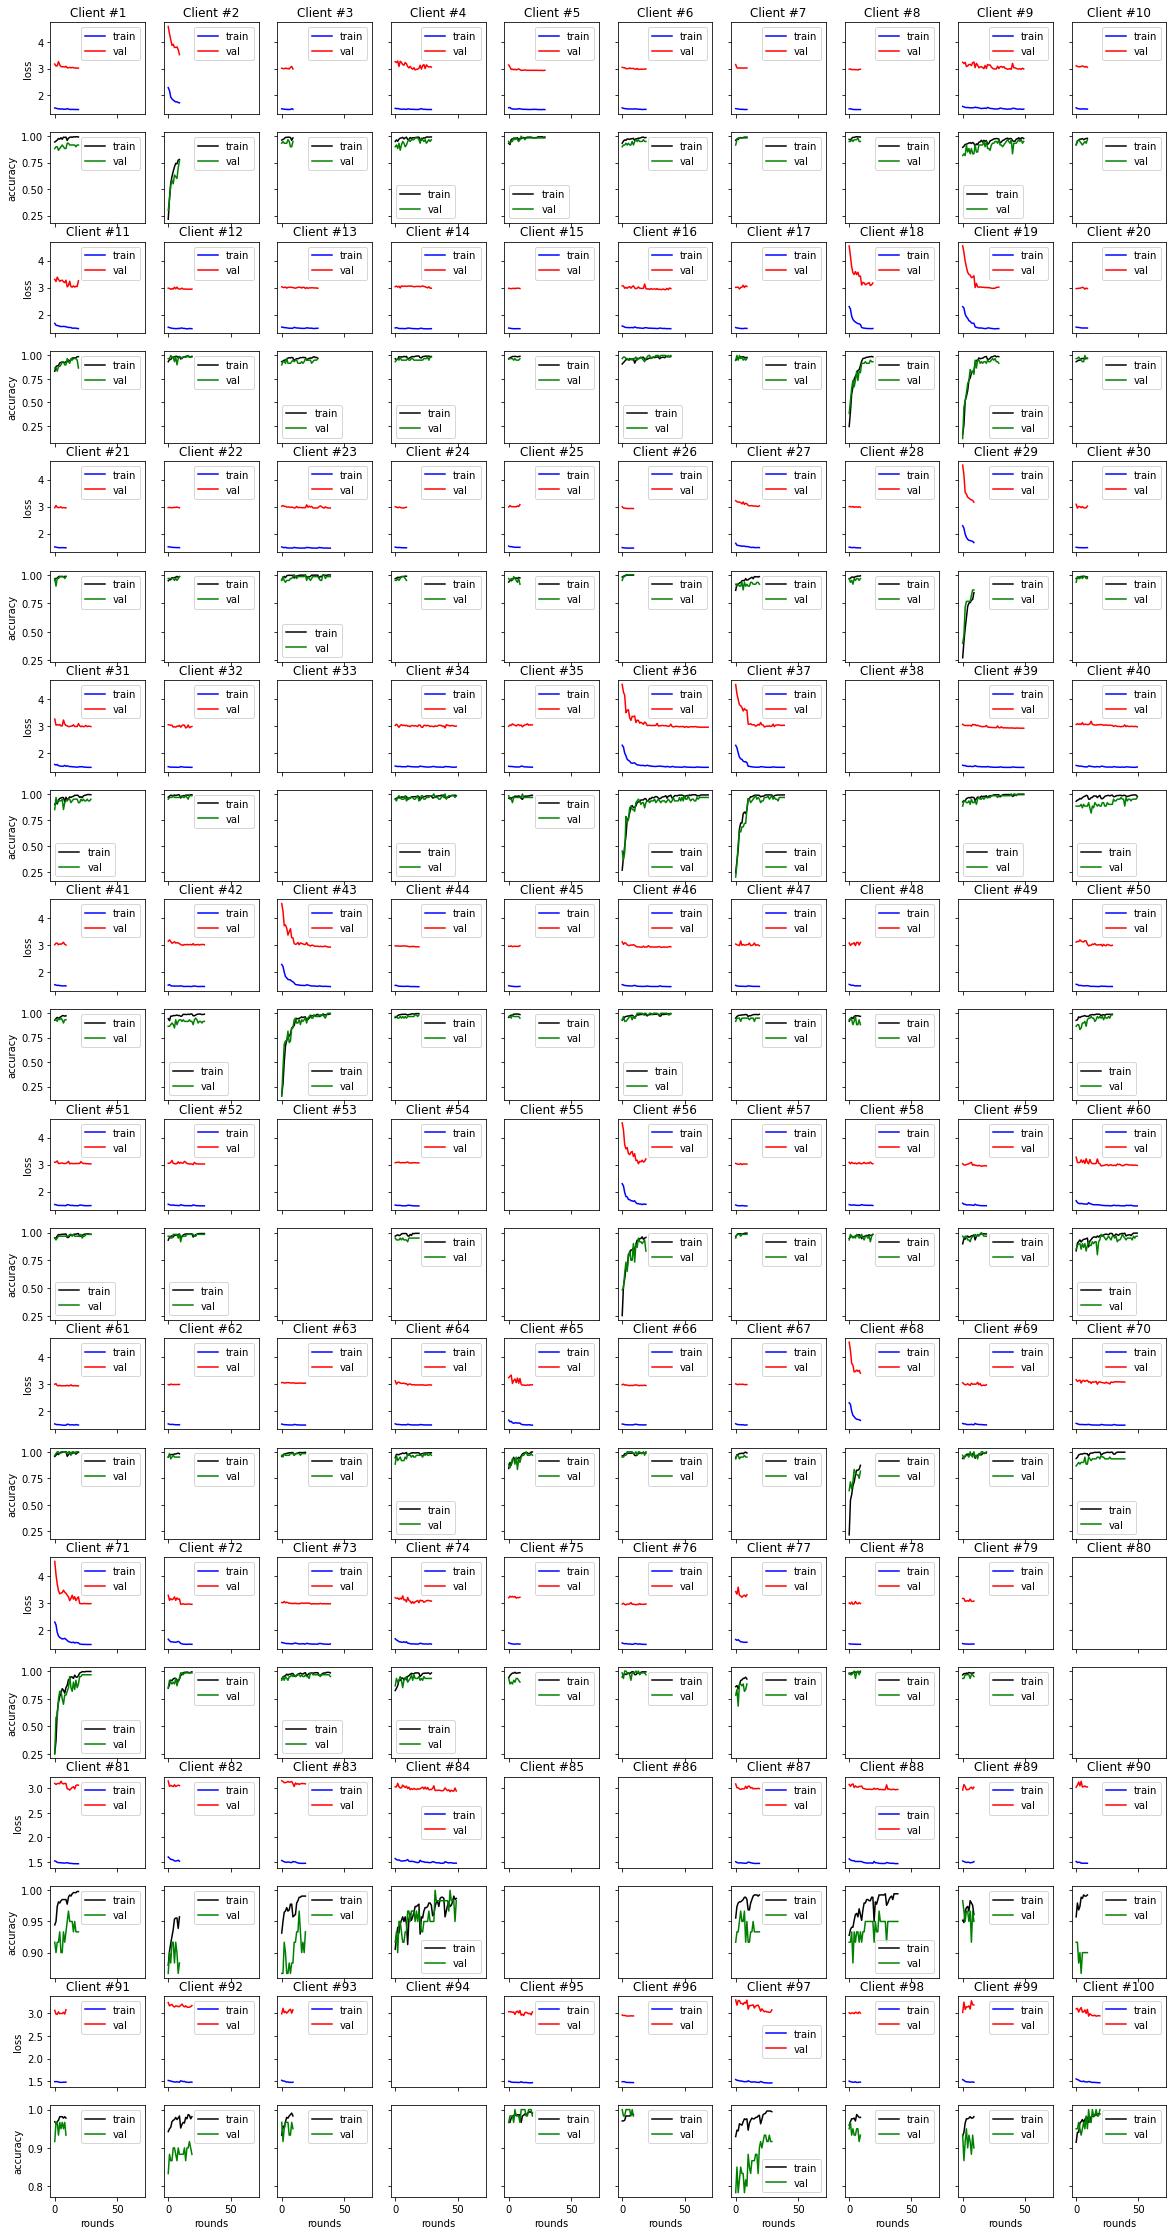

In [15]:
fed_prox.plot()

# <font color='#89A6FB'> Compare </font>


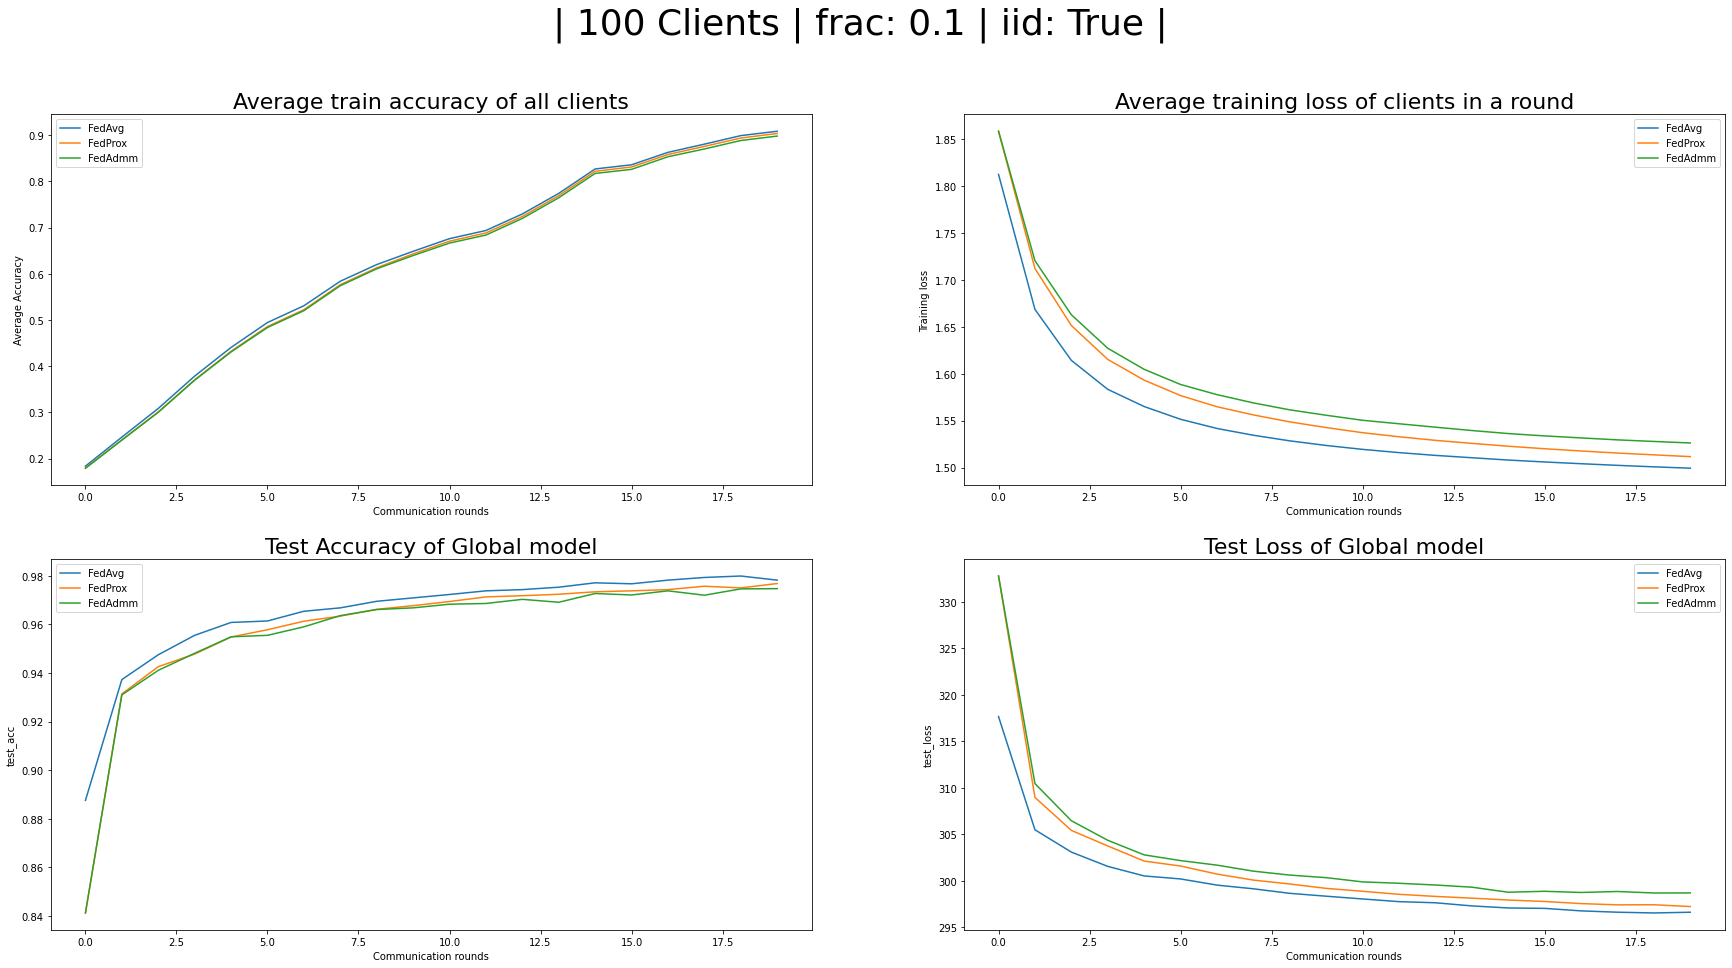

In [41]:
servers_plot([fed_avg,fed_prox,fed_admm],args.num_users,frac,args.iid)